In [4]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from glob import glob
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

## PPG analysis (Why we should consider a singal in frequency domain)

In [9]:
def draw_ppg_fft_signal(target, fold, group_num, is_sym=False):
    if target == 'ppgbp' or target == 'sensors':
        source = 'sensors'
    else:
        source = 'sensors'
        target = 'bcg'

    if is_sym:
        path = f'../results/errors_{source}_{target}_train_head_True_sym_True_ours.csv'
    else:
        path = f'../results/errors_{source}_{target}_train_head_True_sym_False_ours.csv'
        
    df = pd.read_csv(path)
    group_ids = df.loc[df.fold==fold].group.values
    if is_sym:
        path_embs = glob(f"../results/embeddings/{source}-{target}-*_fold{fold}_sym_prompt_*.pt")
    else:
        path_embs = glob(f"../results/embeddings/{source}-{target}*_fold{fold}_sym_prompt_False.pt")        
        
    print(path)
    path_embs = sorted(path_embs)
    print(path_embs)

    print(f"Fold {fold}, Group: {set(group_ids)}")

    print("Get ", path_embs[2])
    prompted_inputs = torch.load(path_embs[2], map_location='cpu')
    print(prompted_inputs.shape)
    print("Get ", path_embs[3])
    raw_inputs = torch.load(path_embs[3], map_location='cpu')
    
    sample_list = np.where(group_ids==group_num)[0]

    if len(sample_list) == 0:
        print(f"Group {group_num} in fold {fold} is empty")
    else:
        sample_list = np.random.choice(np.where(group_ids==1)[0],size=min(len(sample_list), 20))

        for k in sample_list:
            # Step 1: Generate a periodic time series data
            t = np.linspace(0, 1, raw_inputs[0].size()[0])
            # Convert data to torch tensor
            
            # Step 2: Perform FFT using torch.fft.fft
            data_tensor = torch.tensor(raw_inputs[k], dtype=torch.float32)
            fft_result = torch.fft.fft(data_tensor, dim=-1)
            fft_freq = np.fft.fftfreq(t.size, d=(t[1] - t[0]))
            
            # Step 3: Visualize the original time series and FFT result
            fig, axs = plt.subplots(6, 1, figsize=(12, 10))
            
            # Plot the original time series data
            axs[0].plot(t, raw_inputs[k])
            axs[0].set_title(f'Original PPG')
            axs[0].set_xlabel('Time (s)')
            axs[0].set_ylabel('PPG')

            # Plot the FFT result (Magnitude Spectrum)
            # magnitude_spectrum = torch.abs(fft_result.real).cpu().numpy()
            magnitude_spectrum = 2*np.abs(fft_result.cpu().numpy())
            axs[1].plot(fft_freq[:len(t)//2], magnitude_spectrum[:len(t)//2])
            axs[1].set_title('FFT Result (Magnitude Spectrum)')
            axs[1].set_xlabel('Frequency (Hz)')
            axs[1].set_ylabel('Magnitude')

            # Plot the original time series data
            axs[2].plot(t, fft_result.real)
            axs[2].set_title('FFT real')
            axs[2].set_xlabel('Time (s)')
            axs[2].set_ylabel('Magnitude')

            # Plot the original time series data
            axs[3].plot(t, fft_result.imag)
            axs[3].set_title('FFT imag')
            axs[3].set_xlabel('Time (s)')
            axs[3].set_ylabel('Magnitude')

            # Plot the FFT result (Magnitude Spectrum)
            axs[4].plot(t, prompted_inputs[k])
            axs[4].set_title('Prompted input')
            axs[4].set_xlabel('Time (s)')
            axs[4].set_ylabel('PPG')

             # Plot the FFT result (Magnitude Spectrum)
            # magnitude_spectrum = torch.abs(fft_result.real).cpu().numpy()
            data_tensor = torch.tensor(prompted_inputs[k], dtype=torch.float32)
            fft_result = torch.fft.fft(data_tensor, dim=-1)
            fft_freq = np.fft.fftfreq(t.size, d=(t[1] - t[0]))

            magnitude_spectrum = 2*np.abs(fft_result.cpu().numpy())
            axs[5].plot(fft_freq[:len(t)//2], magnitude_spectrum[:len(t)//2])
            axs[5].set_title('Prompted Input iFFT Result (Magnitude Spectrum)')
            axs[5].set_xlabel('Frequency (Hz)')
            axs[5].set_ylabel('Magnitude')

            fig.suptitle(f'{target} PPG sample {k} [Group {group_num}]', fontsize=16)
            
            plt.tight_layout()
            plt.show()

../results/errors_sensors_ppgbp_train_head_True_sym_True_ours.csv
['../results/embeddings/sensors-ppgbp-prompt_global_fold0_sym_prompt_hidden_embs.pt', '../results/embeddings/sensors-ppgbp-prompt_global_fold0_sym_prompt_prompt_hist.pt', '../results/embeddings/sensors-ppgbp-prompt_global_fold0_sym_prompt_prompted_inputs.pt', '../results/embeddings/sensors-ppgbp-prompt_global_fold0_sym_prompt_raw_inputs.pt']
Fold 0, Group: {0, 1, 2, 3}
Get  ../results/embeddings/sensors-ppgbp-prompt_global_fold0_sym_prompt_prompted_inputs.pt
torch.Size([128, 262])
Get  ../results/embeddings/sensors-ppgbp-prompt_global_fold0_sym_prompt_raw_inputs.pt


/tmp/ipykernel_739129/1608729953.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.tensor(raw_inputs[k], dtype=torch.float32)
/tmp/ipykernel_739129/1608729953.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.tensor(prompted_inputs[k], dtype=torch.float32)


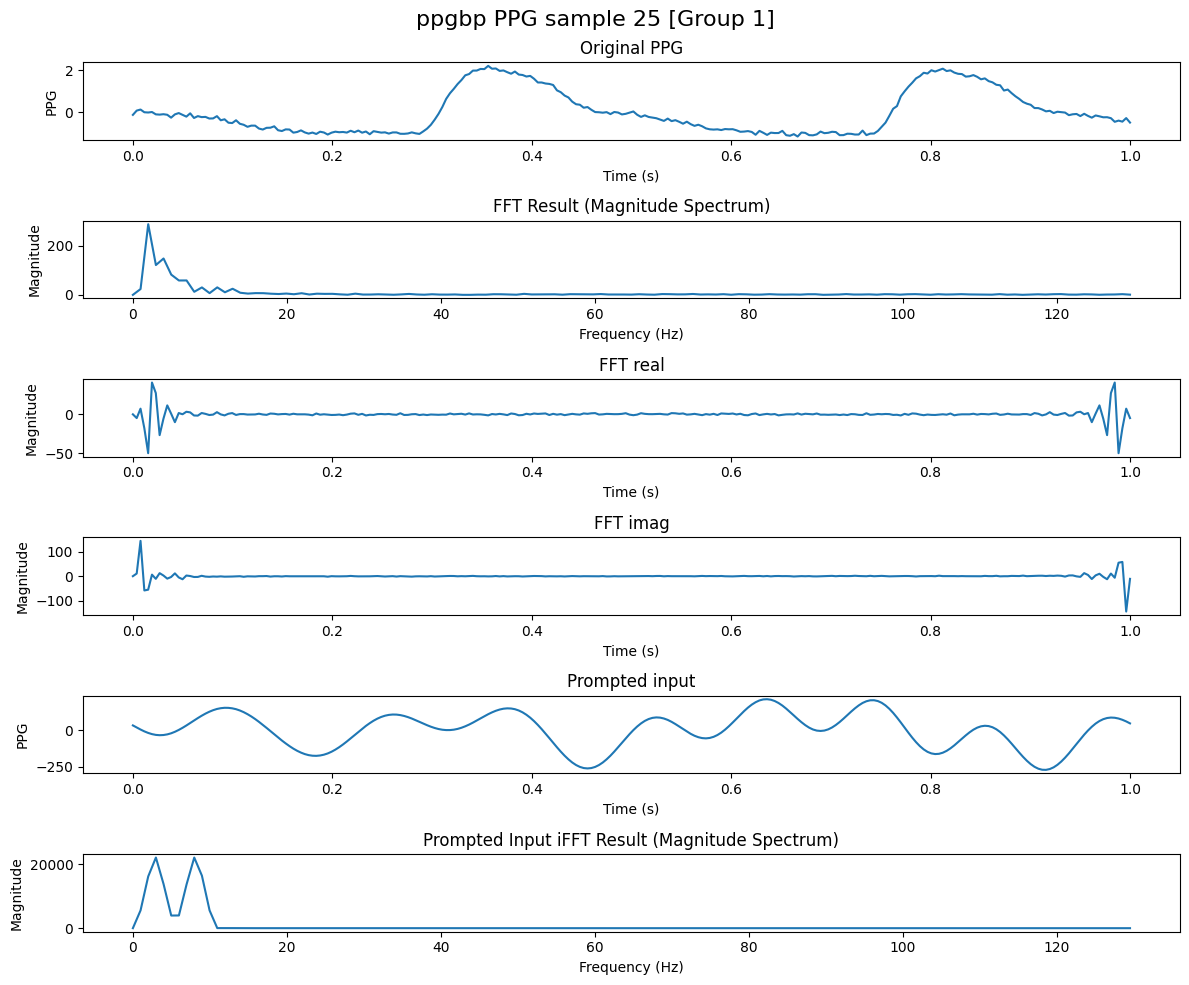

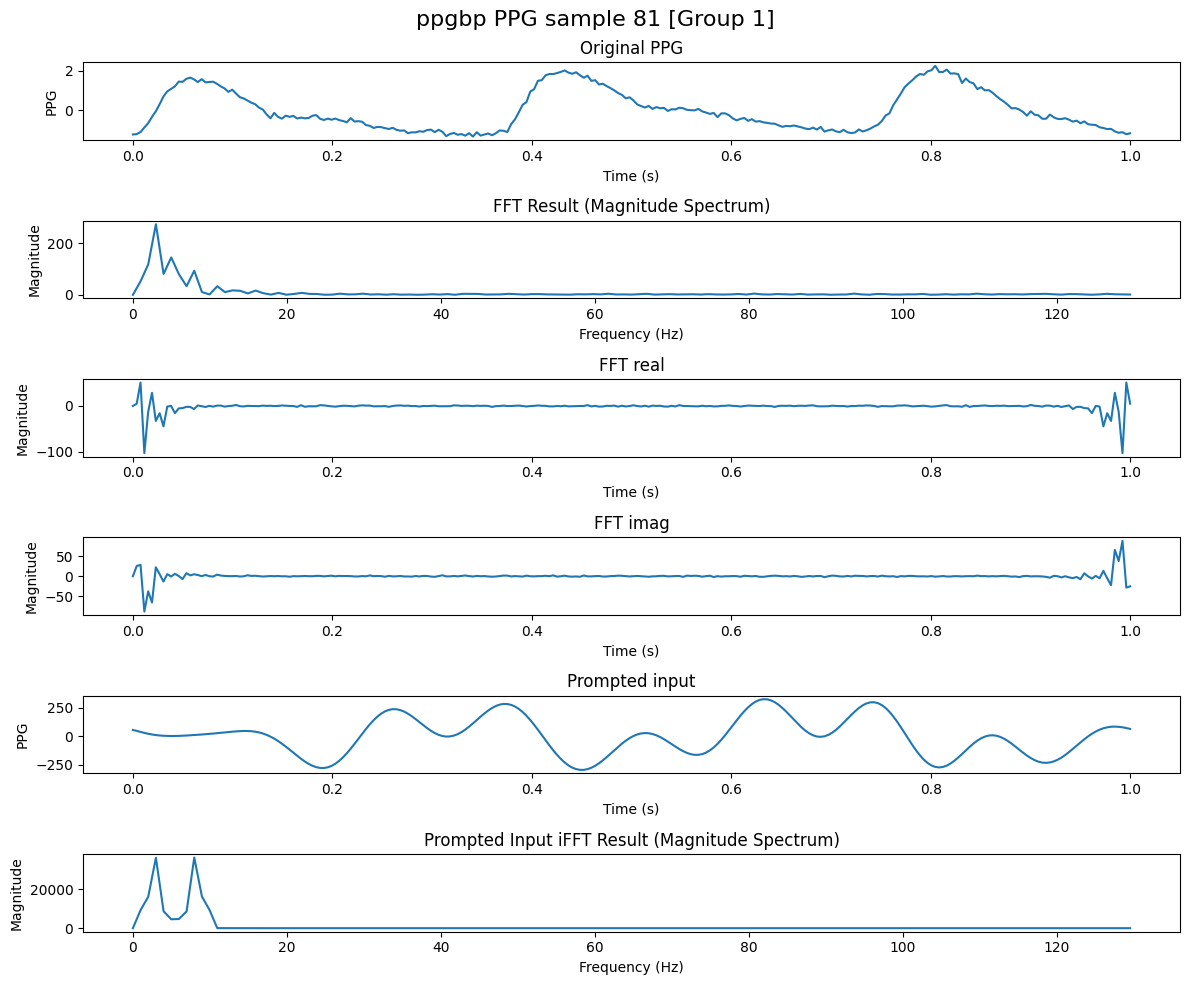

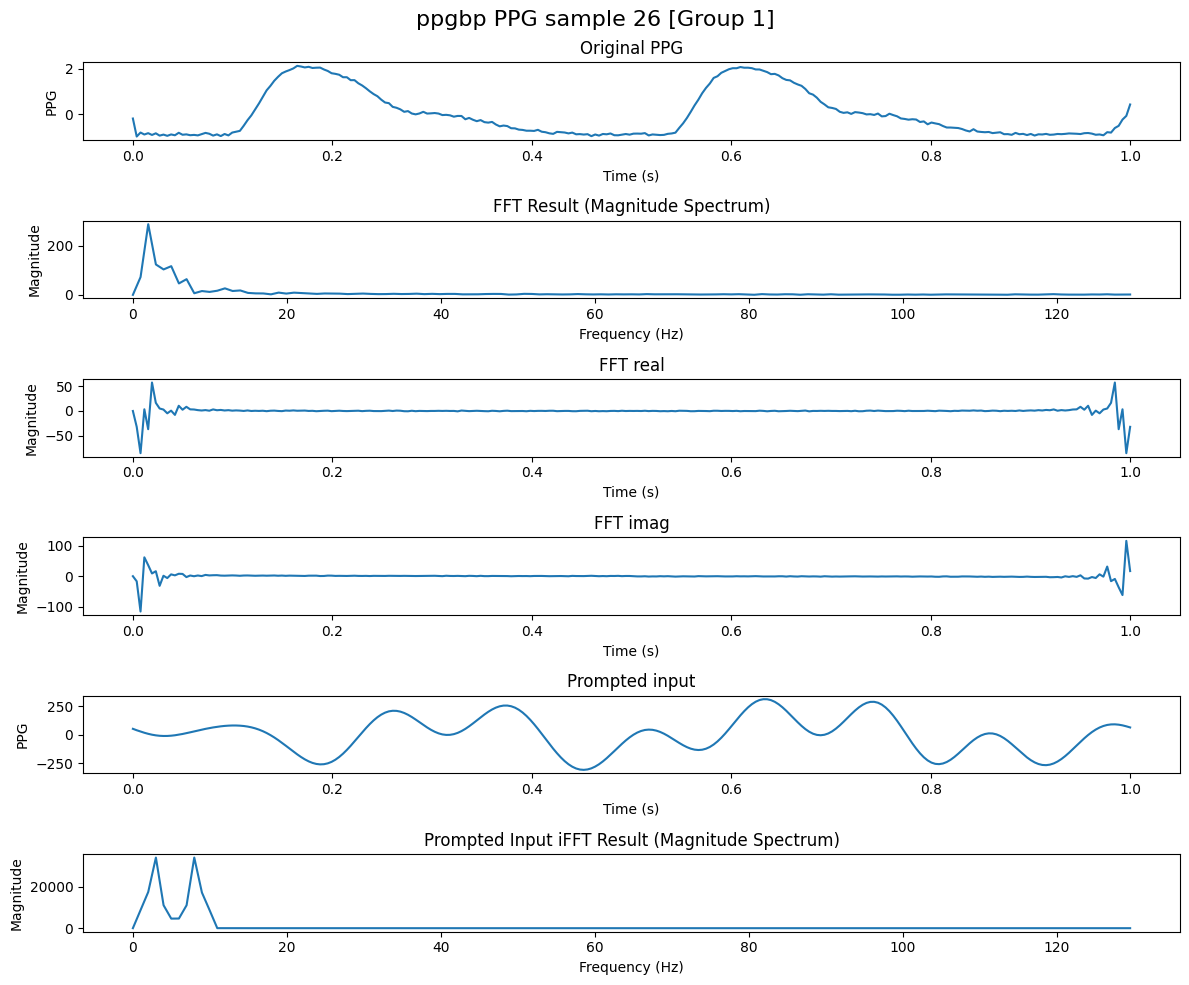

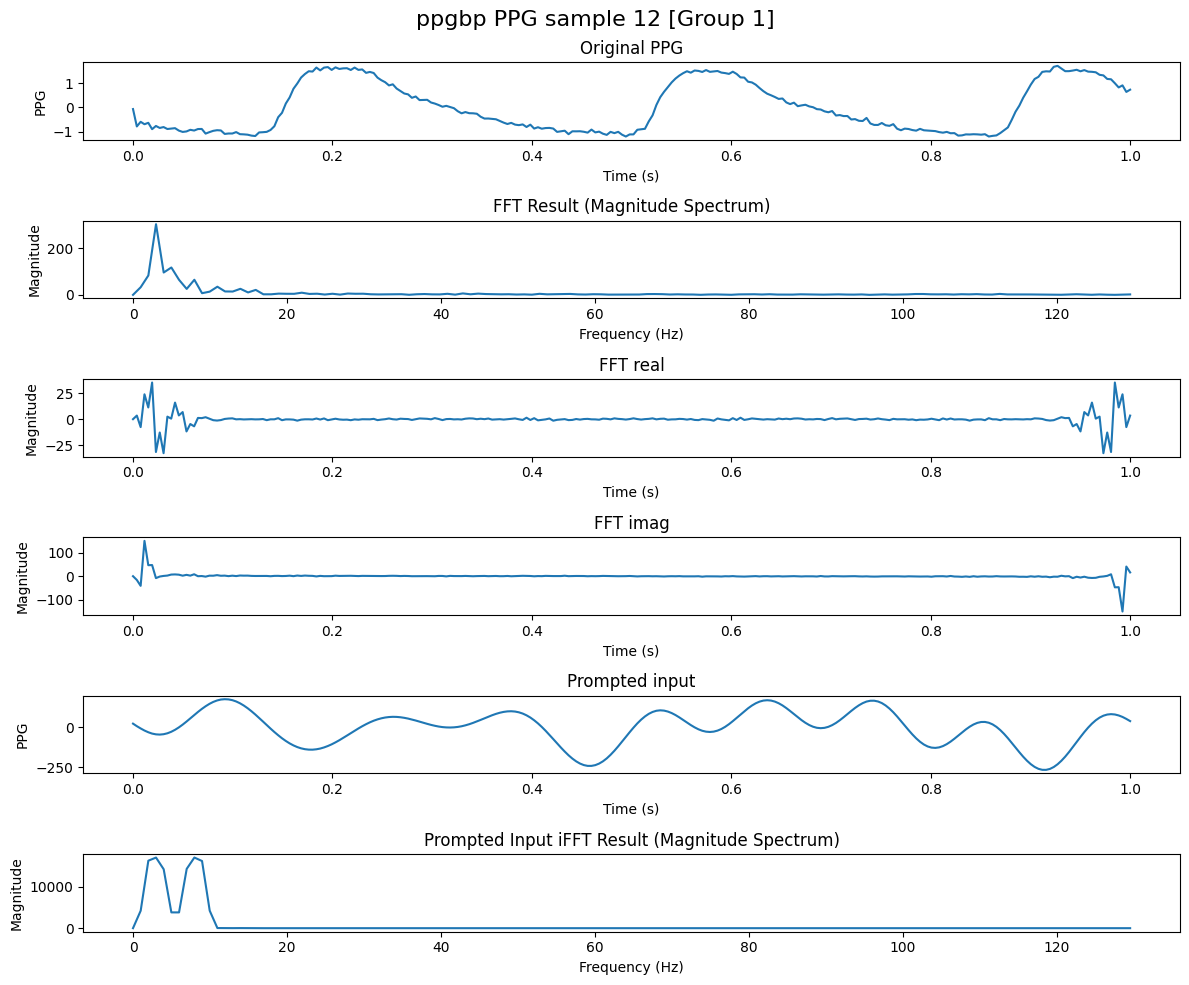

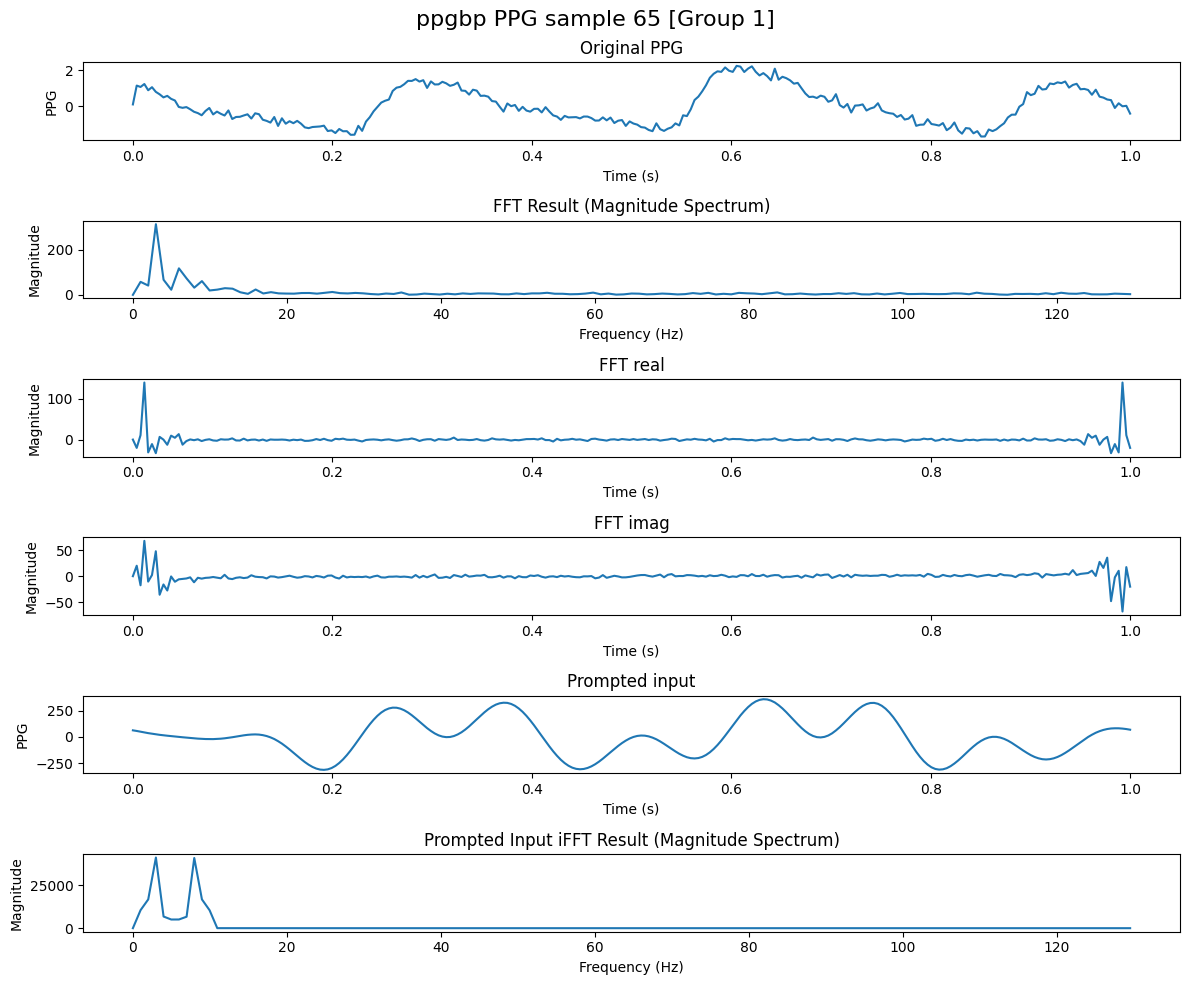

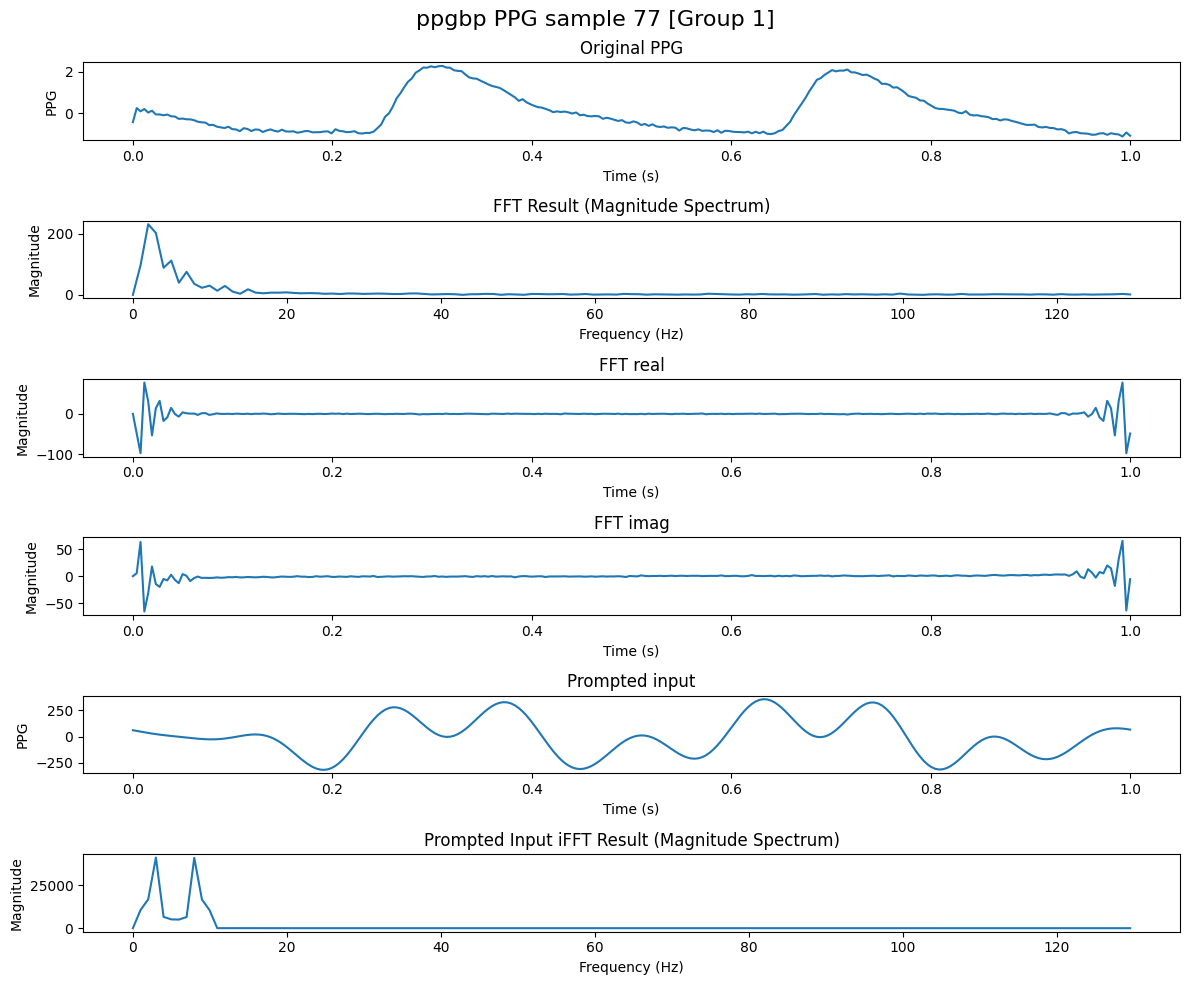

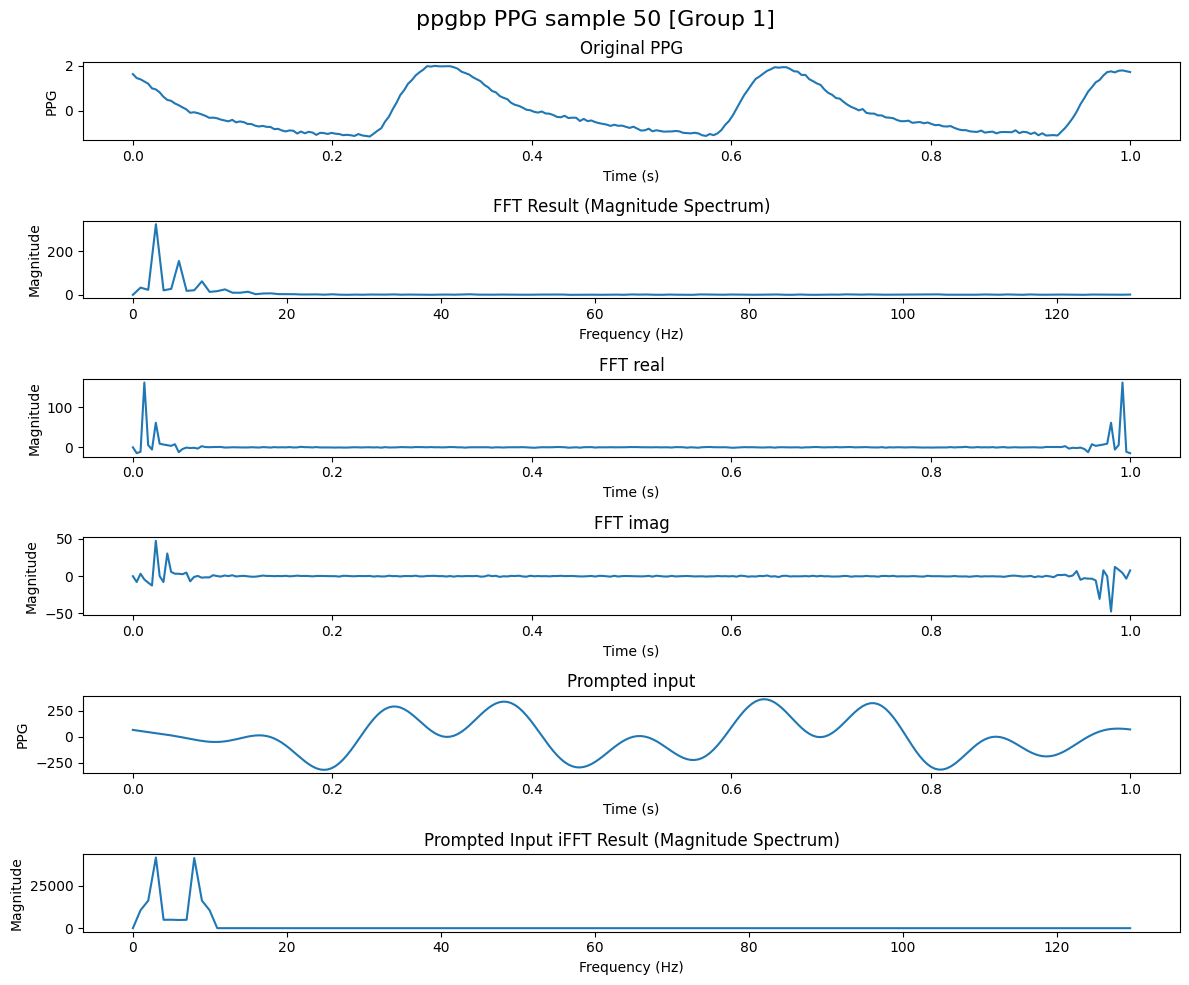

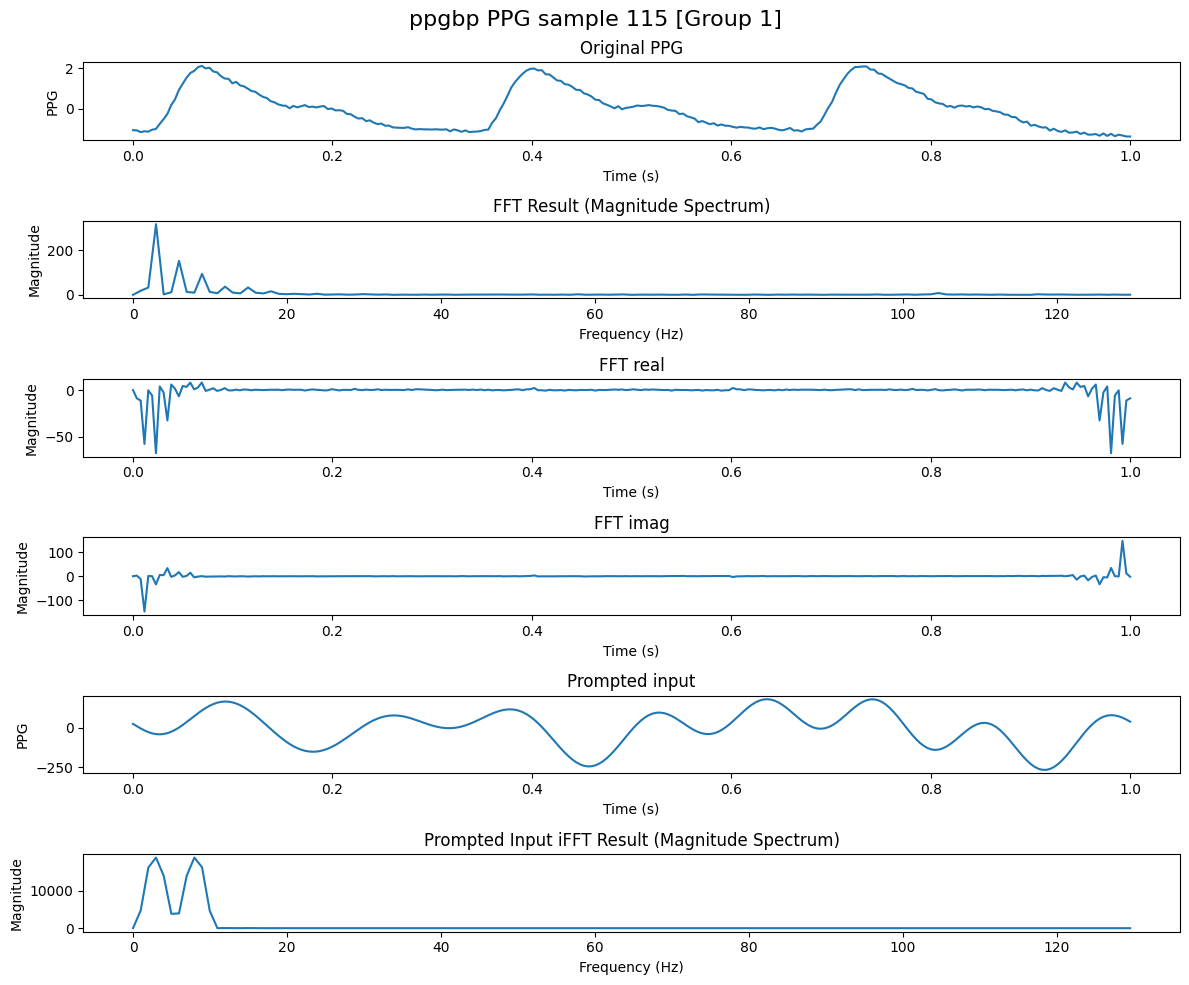

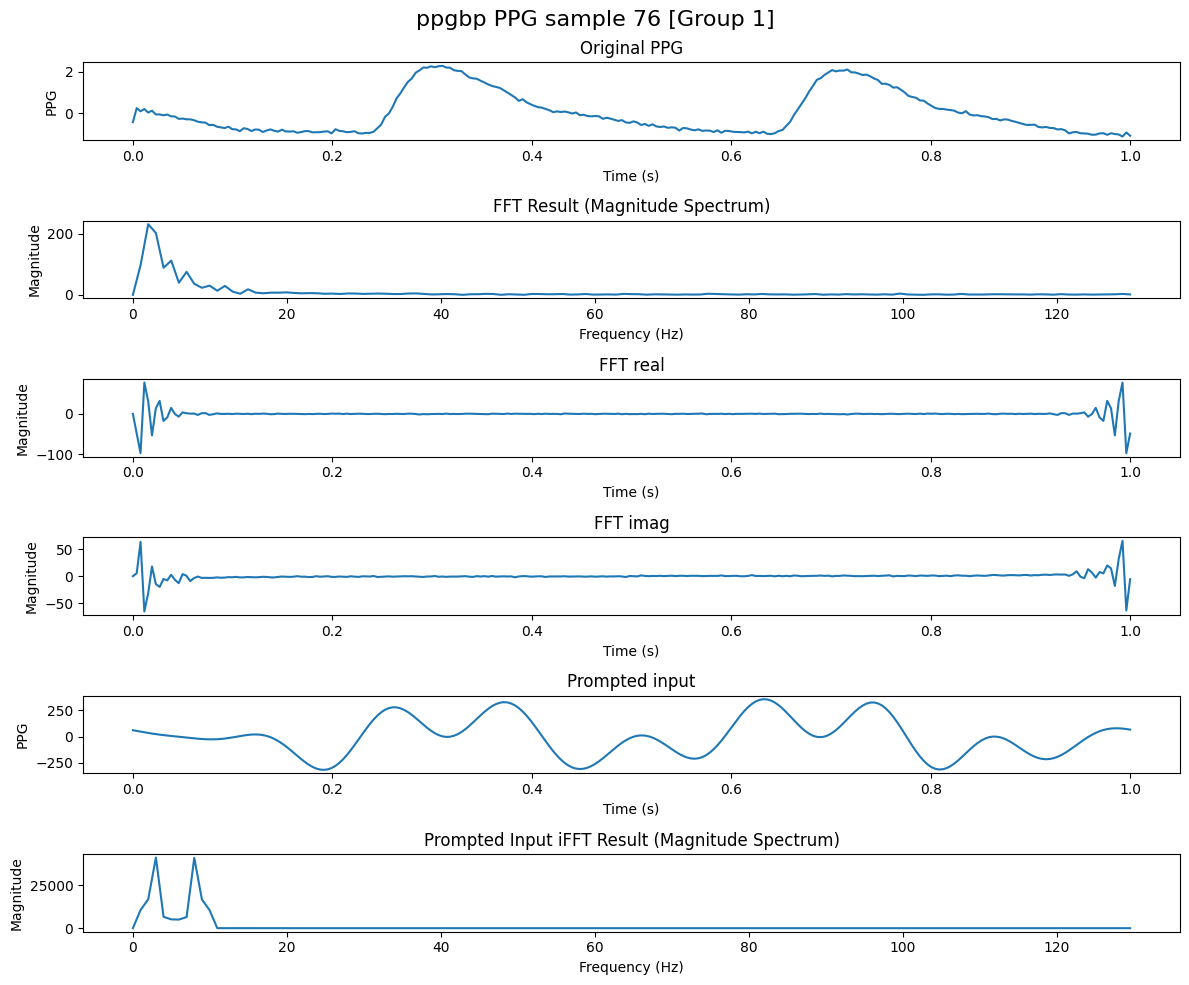

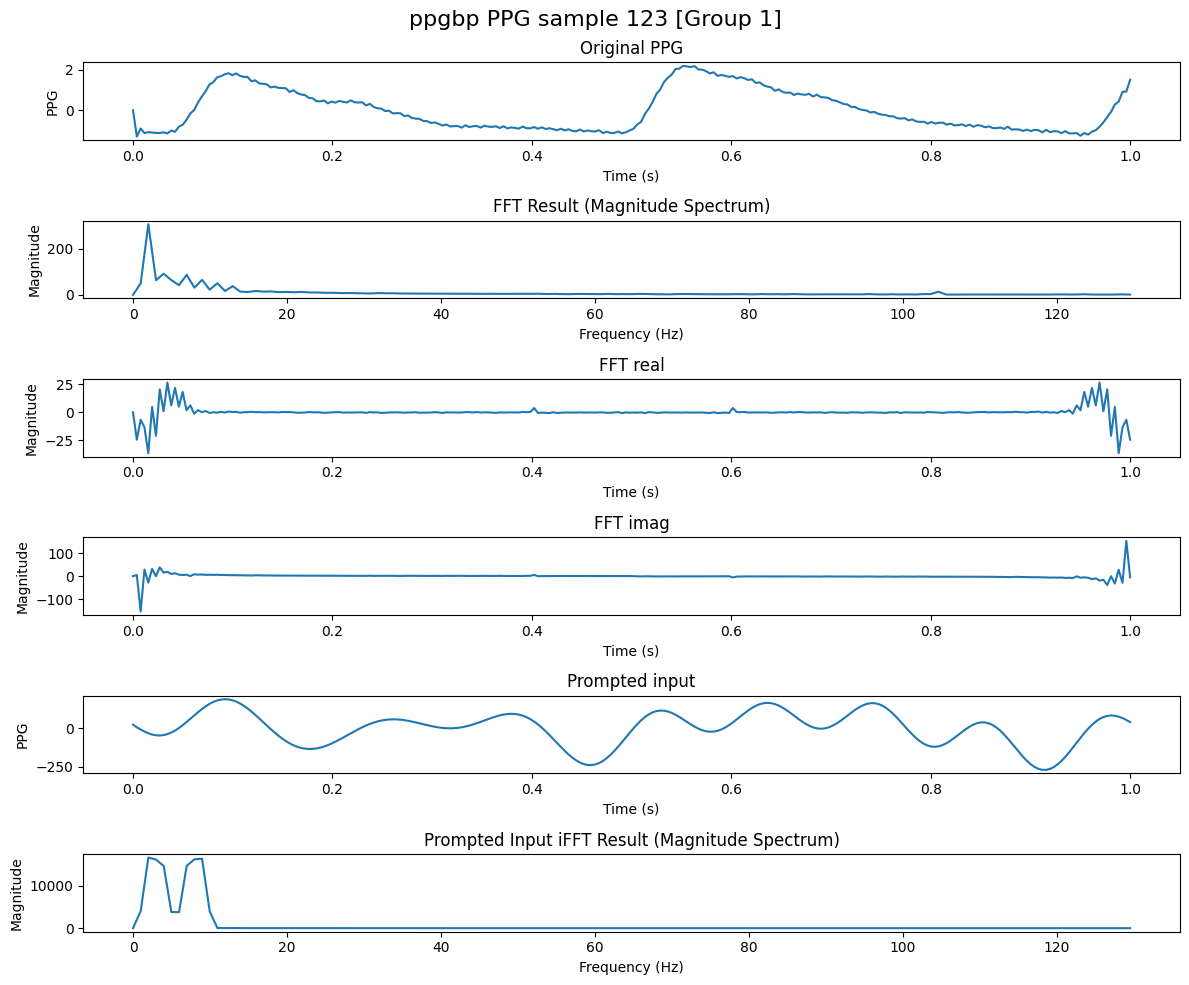

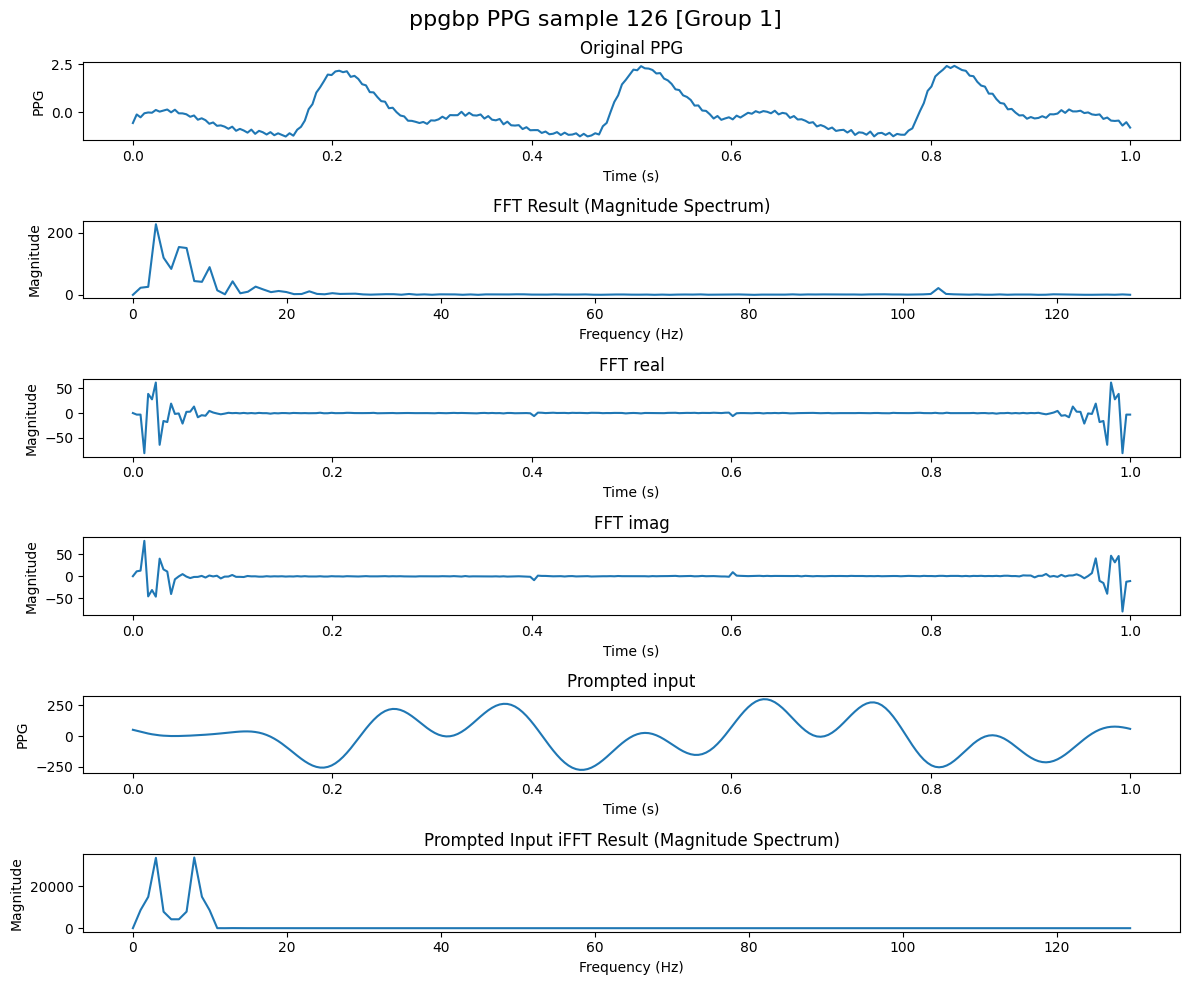

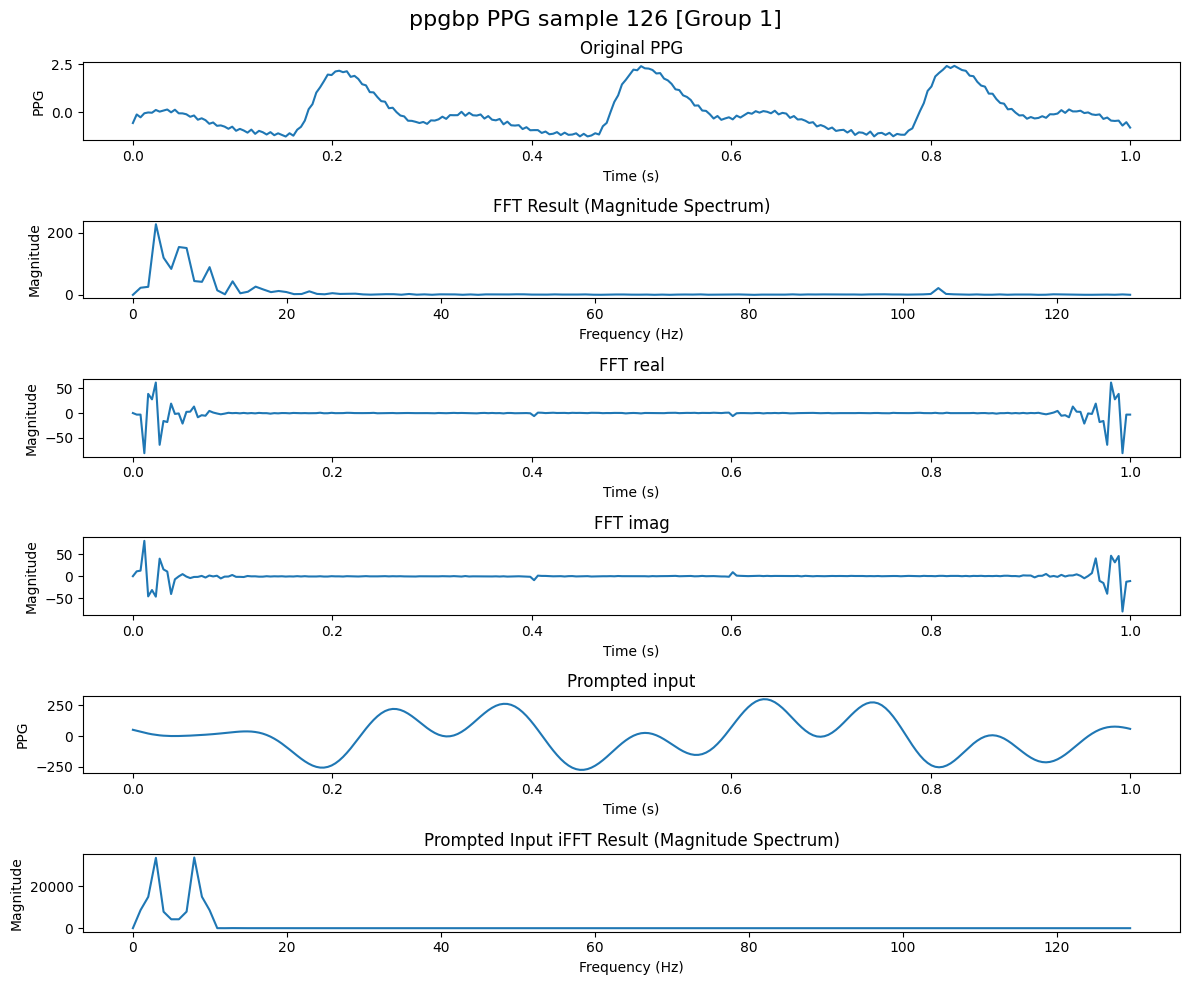

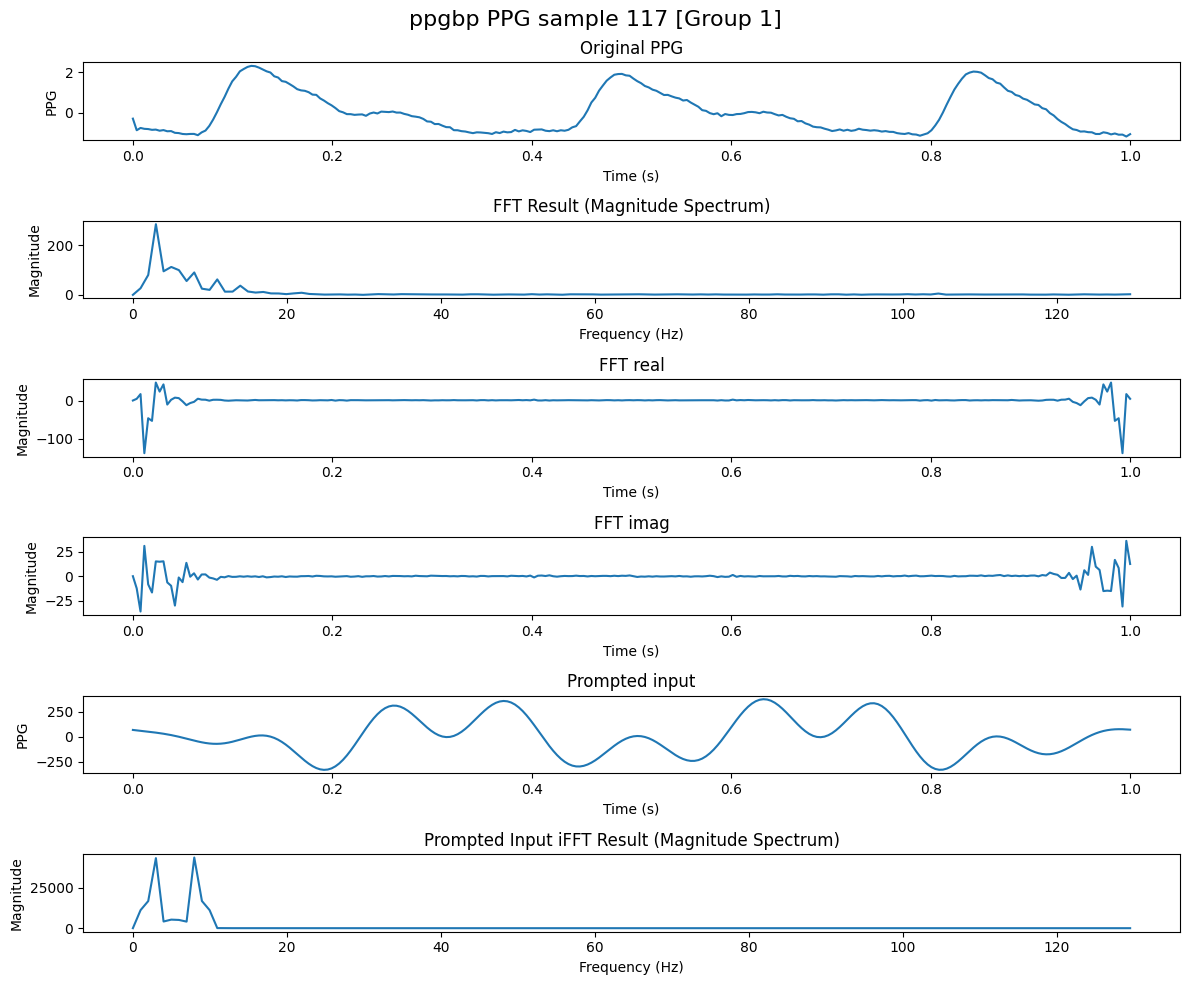

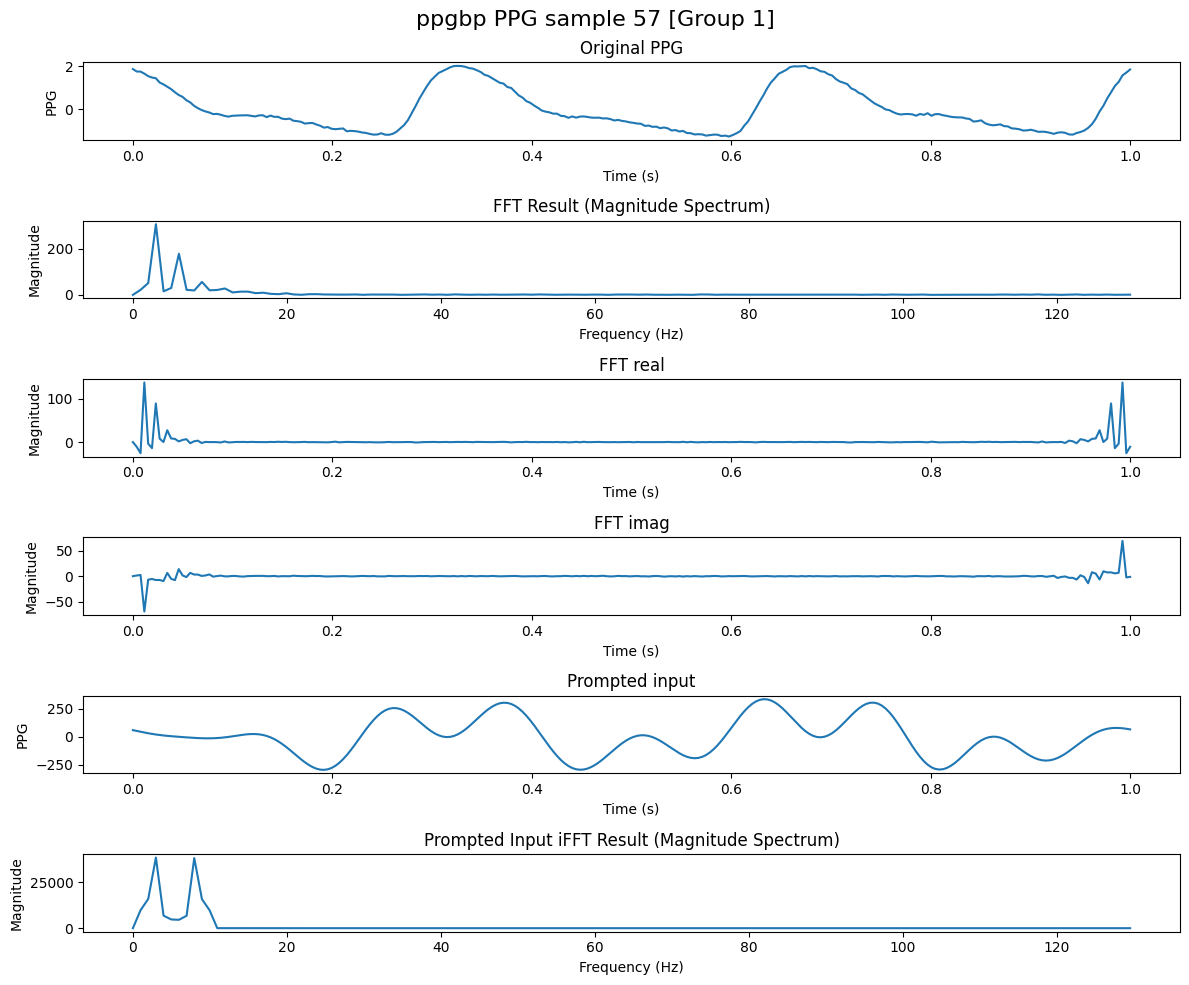

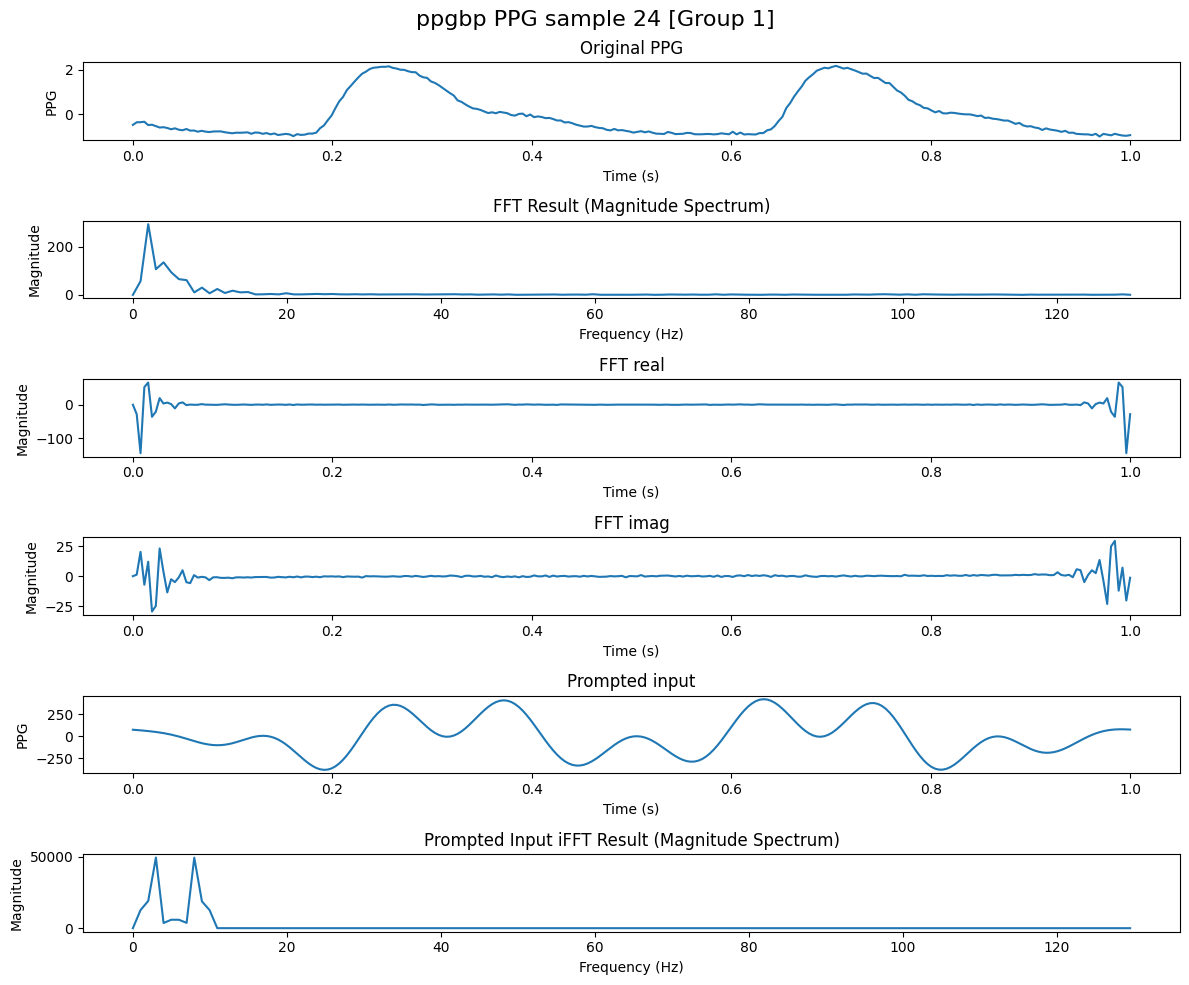

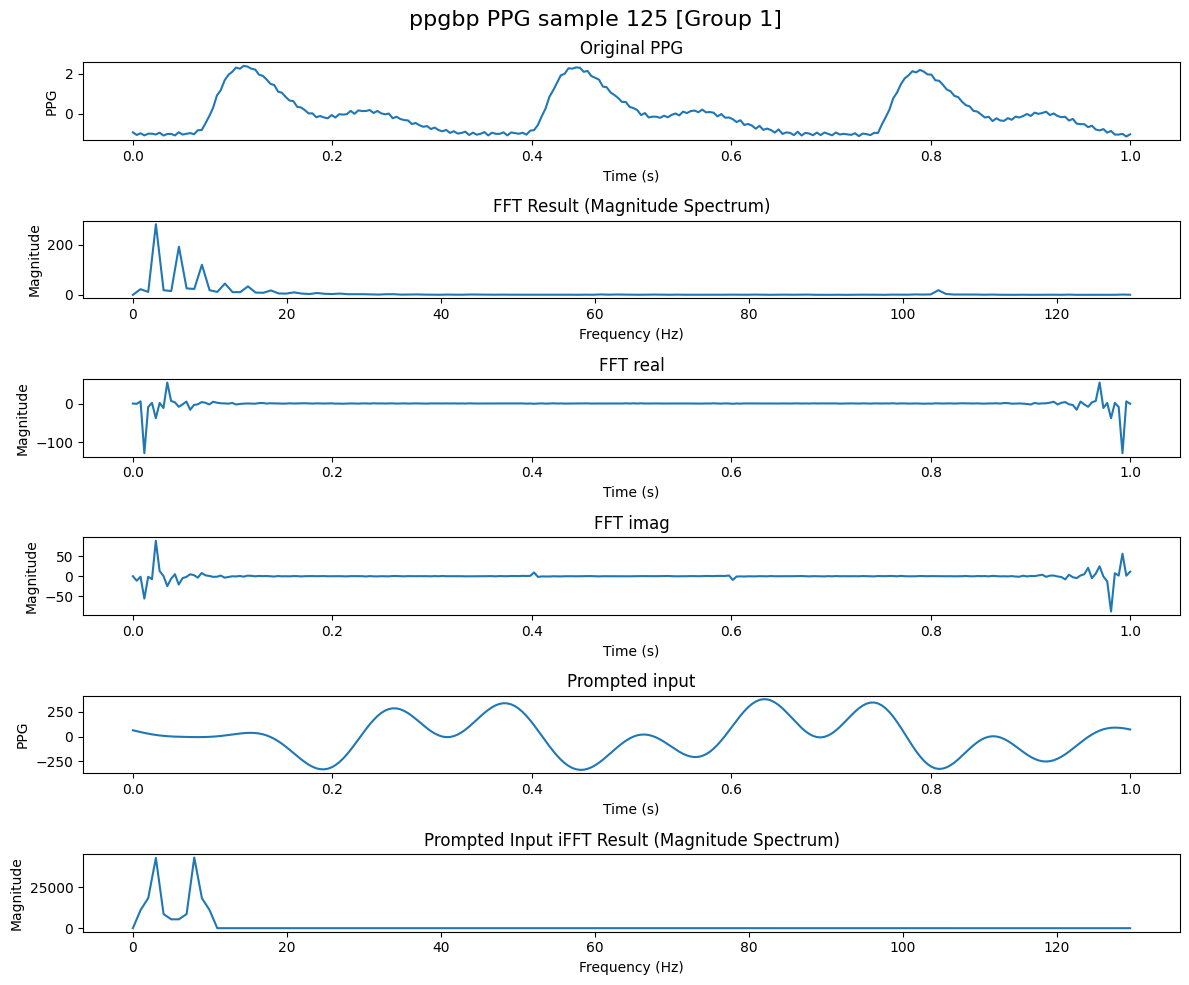

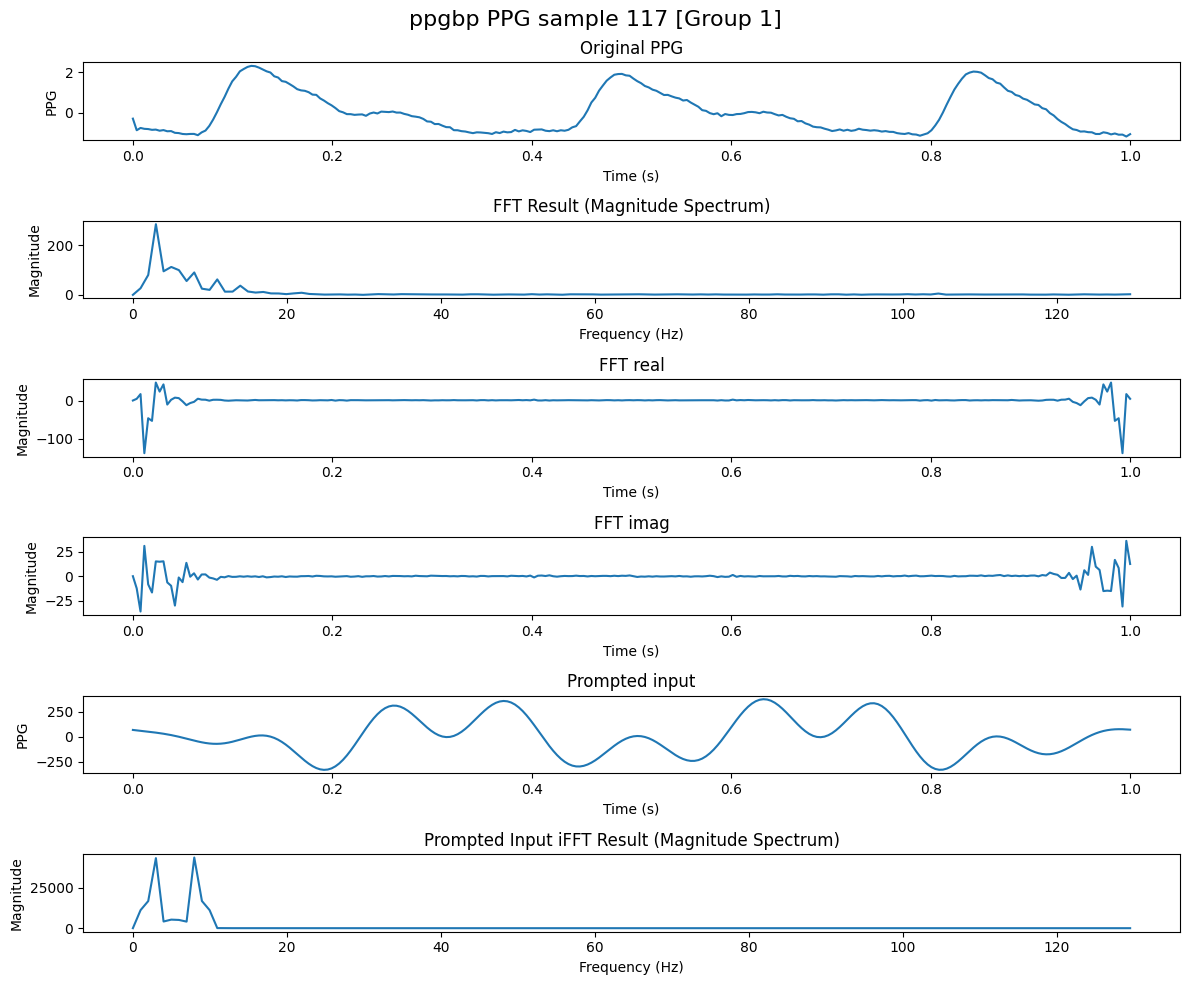

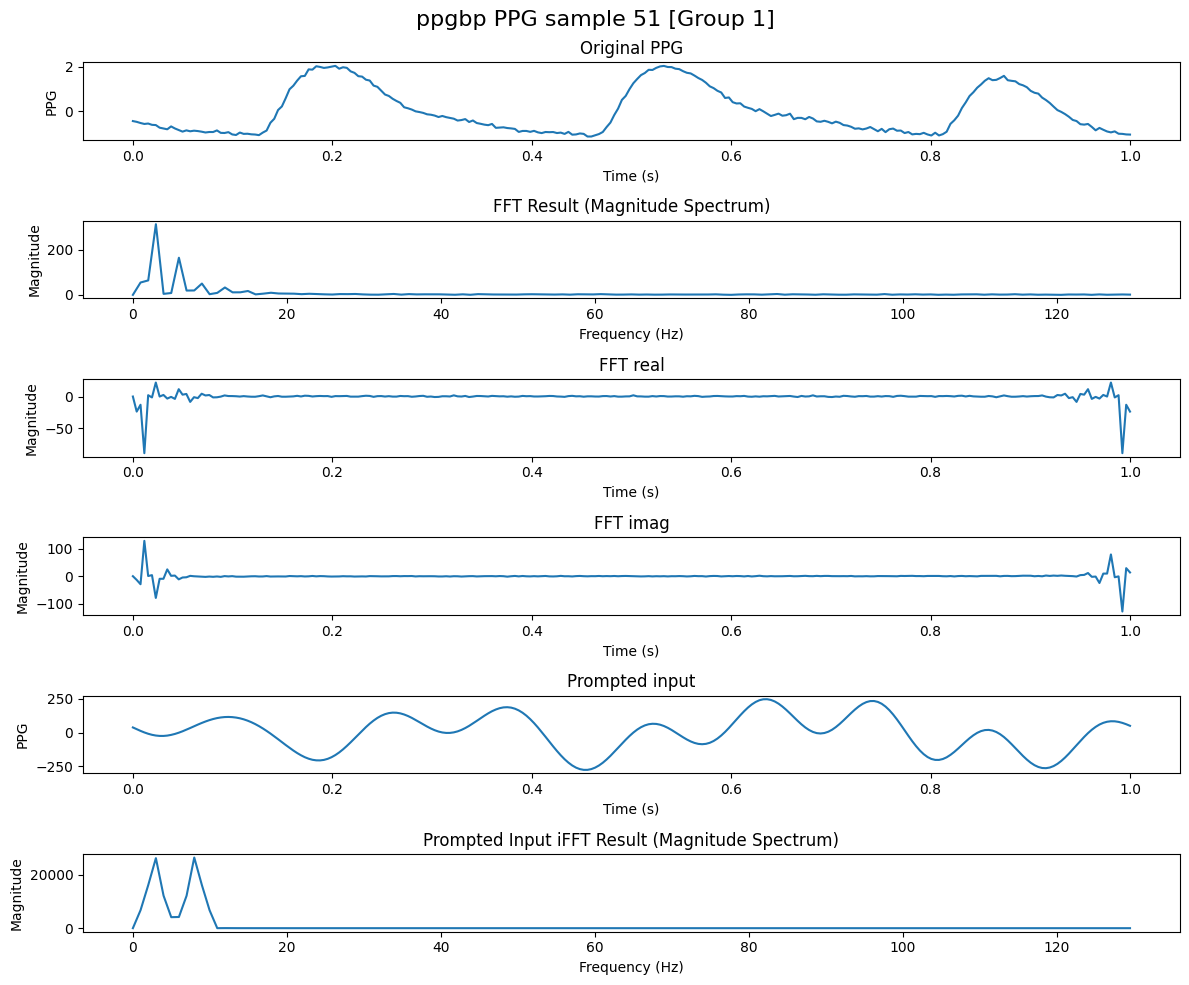

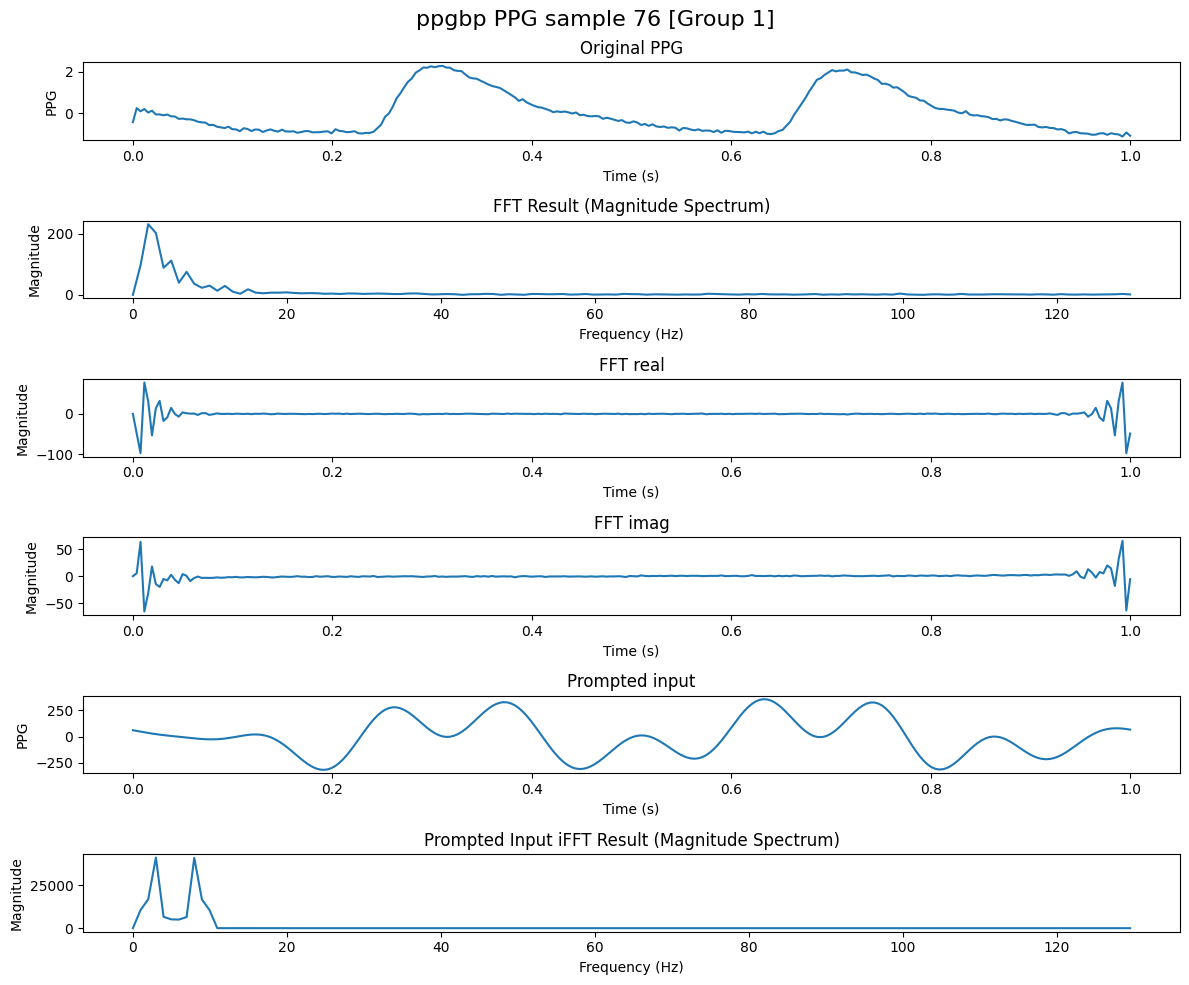

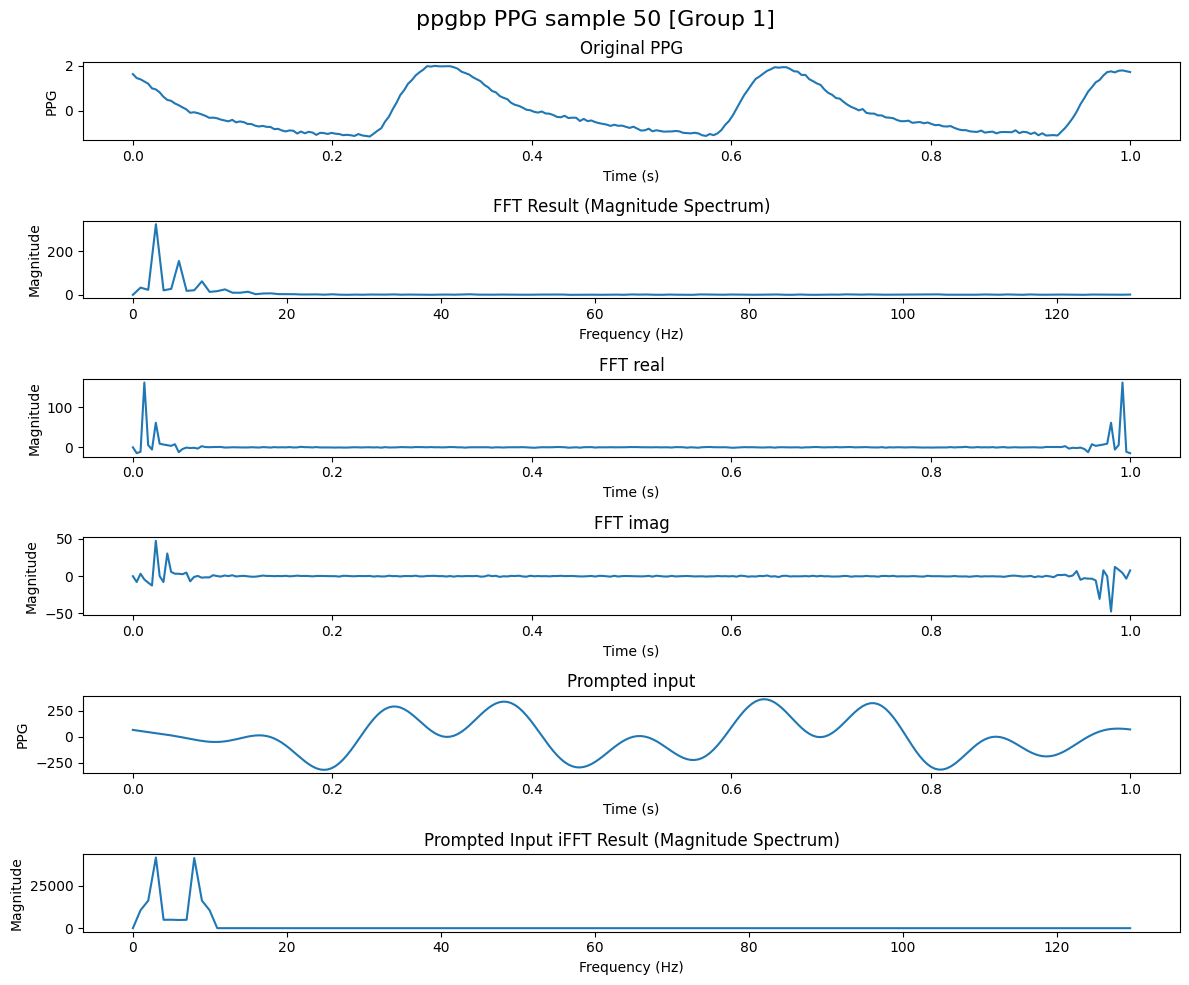

In [10]:
draw_ppg_fft_signal('ppgbp', fold=0, group_num=1, is_sym=True)

In [308]:
df

fold  group  sbp_error  dpb_error
0         0      3 -12.826889 -16.724476
1         0      2 -10.421494 -12.675034
2         0      1  27.218720   0.020317
3         0      1  28.390960   0.762489
4         0      1   8.609955   0.805878
...     ...    ...        ...        ...
11097     4      1  12.136147   5.549103
11098     4      1  18.462800  -0.934505
11099     4      2   1.080200  -4.032162
11100     4      2   0.717835 -12.546841
11101     4      2  -4.345955 -13.262825

[11102 rows x 4 columns]

In [185]:
fold=0
source = 'bcg'
target = 'sensors'

path = f'../results/errors_{source}_{target}_ours.csv'
df = pd.read_csv(path)
group_ids = df.loc[df.fold==fold].group.values
path_embs = glob(f"../results/embeddings/{source}-{target}*_fold{fold}_*.pt")
path_embs = sorted(path_embs)

print(f"Fold {fold}, Group: {set(group_ids)}")

print("Get ", path_embs[0])
hidden_embs = torch.load(path_embs[0], map_location='cpu')
print("Get ", path_embs[1])
prompted_inputs = torch.load(path_embs[1], map_location='cpu')
print("Get ", path_embs[2])
raw_inputs = torch.load(path_embs[2], map_location='cpu')

Fold 0, Group: {0, 1, 2, 3}
Get  ../results/embeddings/bcg-sensors-prompt_global_fold0_hidden_embs.pt
Get  ../results/embeddings/bcg-sensors-prompt_global_fold0_prompted_inputs.pt
Get  ../results/embeddings/bcg-sensors-prompt_global_fold0_raw_inputs.pt


#### tSNE

In [186]:
data_raw = raw_inputs.numpy() if isinstance(raw_inputs, torch.Tensor) else raw_inputs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
raw_embedding = tsne.fit_transform(data_raw)

In [187]:
fft_inputs =  torch.fft.fft(raw_inputs, dim=-1)
fft_real_inputs = fft_inputs.real
fft_img_inputs = fft_inputs.imag

In [188]:
data_fft_real = prompted_inputs.numpy() if isinstance(fft_real_inputs, torch.Tensor) else fft_real_inputs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
fft_real_embedding = tsne.fit_transform(data_fft_real)

In [189]:
data_fft_img = prompted_inputs.numpy() if isinstance(fft_img_inputs, torch.Tensor) else fft_img_inputs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
fft_img_embedding = tsne.fit_transform(data_fft_img)

In [190]:
x_min, x_max = min(raw_embedding[:, 0].min(), fft_real_embedding[:, 0].min(), fft_img_embedding[:, 0].min()), max(raw_embedding[:, 0].max(), fft_real_embedding[:, 0].max(), fft_img_embedding[:, 0].max())
y_min, y_max = min(raw_embedding[:, 1].min(), fft_real_embedding[:, 1].min(), fft_img_embedding[:, 1].min()), max(raw_embedding[:, 1].max(), fft_real_embedding[:, 1].max(), fft_img_embedding[:, 1].max())
x_range = x_max - x_min
y_range = y_max - y_min

In [255]:
def plot_tsne(embs, signal='PPG', g_idx=None):
    # Create a discrete color map with better distinction
    unique_groups = sorted(set(group_ids))
    n_groups = len(unique_groups)
    colors = sns.color_palette("husl", n_colors=n_groups)  # Using seaborn's husl palette for better distinction
    color_map = ListedColormap(colors)
    
    # Create the plot with explicit white background
    plt.figure(figsize=(12, 10))
    ax = plt.axes()
    # ax.set_facecolor('white')

    if g_idx == None:
        scatter = plt.scatter(embs[:, 0], embs[:, 1], 
                              c=group_ids, cmap=color_map, 
                              s=70, alpha=0.8, edgecolors='none')
        plt.title('t-SNE Projection of FFT real input', fontsize=16, fontweight='bold')
    else:
        g_list = np.where(group_ids == g_idx)[0]
        scatter = plt.scatter(embs[g_list, 0], embs[g_list, 1], 
                              c=group_ids[g_list], cmap=color_map, 
                              s=70, alpha=0.8, edgecolors='none')
        
        plt.title(f't-SNE Projection of {signal} input in Group {g_idx}', fontsize=16, fontweight='bold')
    
    plt.xlabel('t-SNE1', fontsize=14)
    plt.ylabel('t-SNE2', fontsize=14)
    plt.xlim(x_min - 0.1 * x_range, x_max + 0.1 * x_range)
    plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)
    
    # # Add a color bar
    # cbar = plt.colorbar(scatter, ticks=range(n_groups), 
    #                     label='Group ID', pad=0.02)
    # cbar.set_ticklabels(unique_groups)
    # cbar.ax.tick_params(labelsize=12)
    # cbar.set_label('Group ID', size=14)
    
    # Add a legend with larger markers
    for i, group in enumerate(unique_groups):
        plt.scatter([], [], c=[colors[i]], s=100, label=f'Group {group}')
    plt.legend(title="Groups", title_fontsize=14, fontsize=12, loc=0)
    
    plt.tight_layout()
    plt.show()

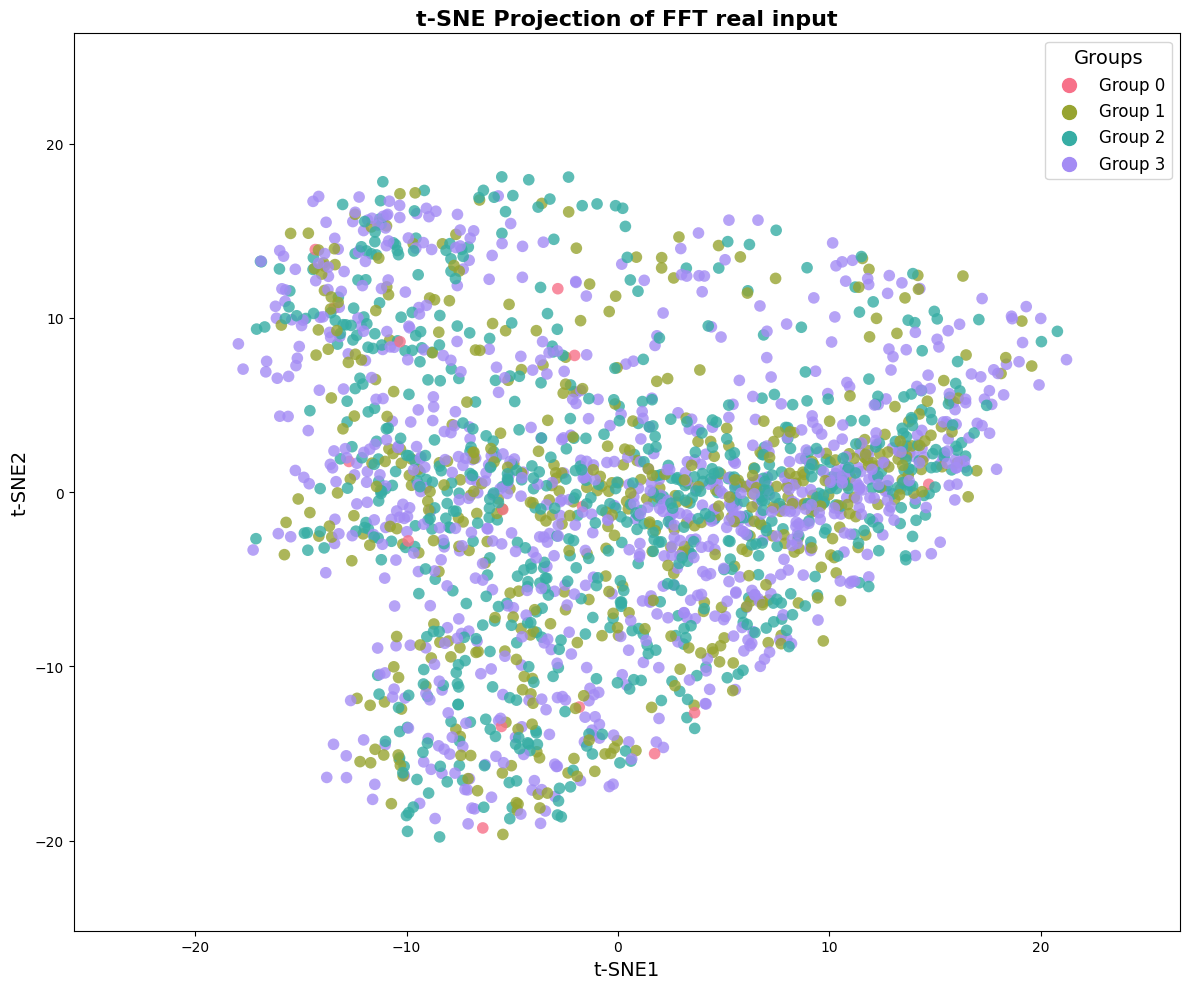

In [248]:
plot_tsne(fft_real_embedding, signal='FFT real', g_idx=None)

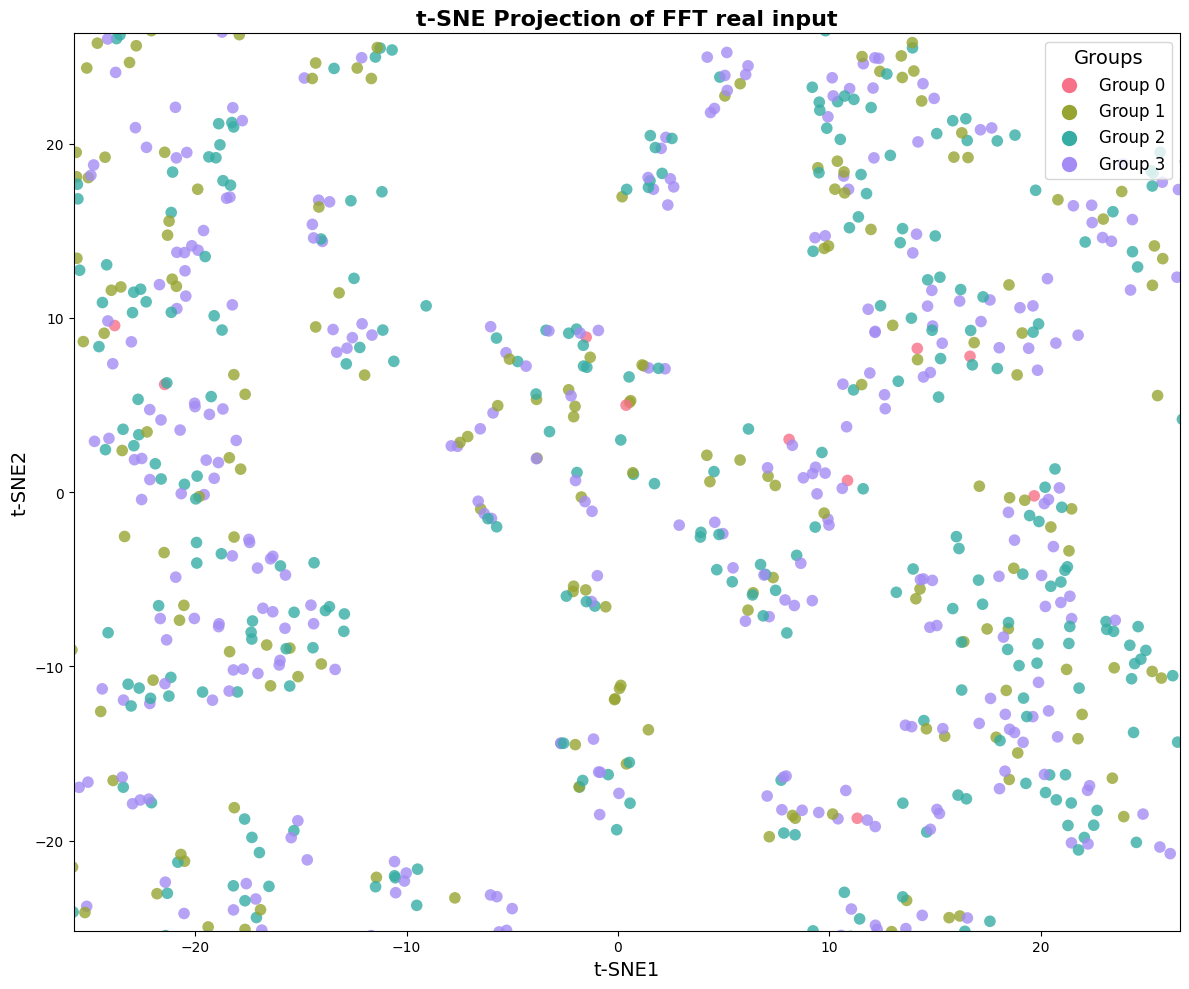

In [249]:
plot_tsne(fft_embedding, signal='PPG', g_idx=None)

## Prompt histogram

In [ ]:
path_embs = glob(f"../results/embeddings/{source}-{target}-*_fold{fold}_sym_prompt_*.pt")
path_embs = sorted(path_embs)
for p in path_embs:
    print(p)
    
hidden_embs = torch.load(path_embs[0], map_location='cpu')
prompt_hist = torch.load(path_embs[1], map_location='cpu')
prompted_inputs = torch.load(path_embs[2], map_location='cpu')
raw_inputs = torch.load(path_embs[3], map_location='cpu')

In [134]:
fold=0
shot=5
source = 'sensors'
target = 'ppgbp'

path = f'../results/errors_{source}_{target}_train_head_True_sym_True_ours.csv'
print(path)

df = pd.read_csv(path)
group_ids = df.loc[df.fold==fold].group.values

path_embs = glob(f"../results/embeddings/{source}-{target}-*_fold{fold}_sym_prompt_*.pt")
path_embs = sorted(path_embs)
for p in path_embs:
    print(p)

print(f"Fold {fold}, Group: {set(group_ids)}")


hidden_embs = torch.load(path_embs[0], map_location='cpu')
prompt_hist = torch.load(path_embs[1], map_location='cpu')
prompted_inputs = torch.load(path_embs[2], map_location='cpu')
raw_inputs = torch.load(path_embs[3], map_location='cpu')

../results/errors_sensors_ppgbp_train_head_True_sym_True_ours.csv
../results/embeddings/sensors-ppgbp-prompt_global_fold0_sym_prompt_hidden_embs.pt
../results/embeddings/sensors-ppgbp-prompt_global_fold0_sym_prompt_prompt_hist.pt
../results/embeddings/sensors-ppgbp-prompt_global_fold0_sym_prompt_prompted_inputs.pt
../results/embeddings/sensors-ppgbp-prompt_global_fold0_sym_prompt_raw_inputs.pt
Fold 0, Group: {0, 1, 2, 3}


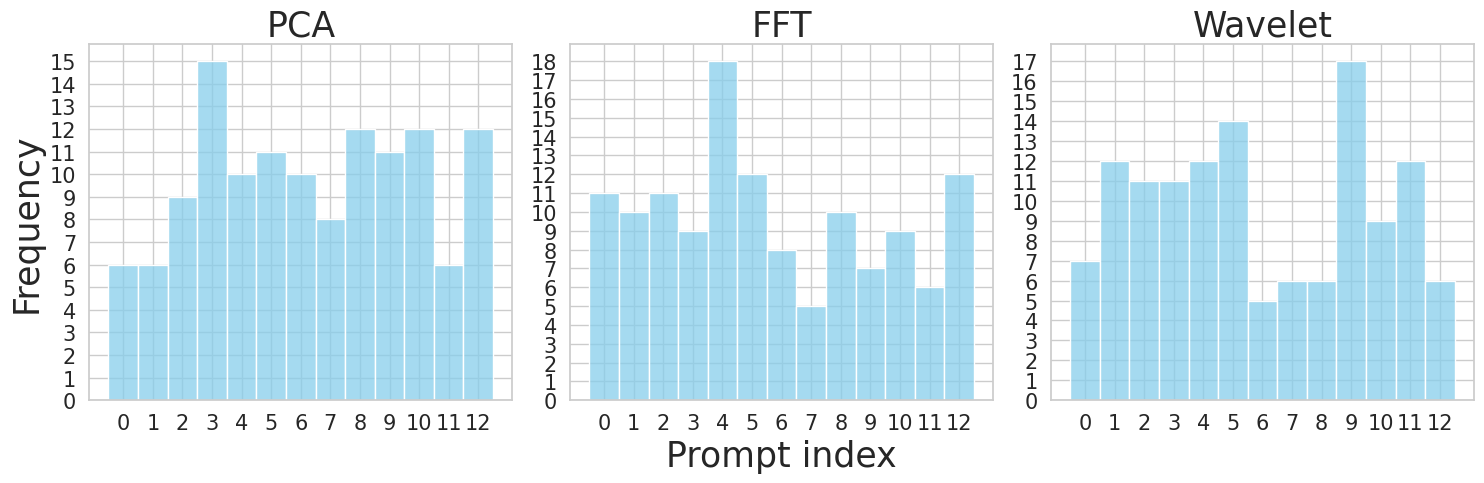

In [133]:
num_prompt = max(torch.unique(prompt_hist)).item()

sns.set(style="whitegrid")

col_name = ['PCA', 'FFT', 'Wavelet']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    _dict=dict((k,len(torch.where(prompt_hist[:,i]==k)[0])) for k in range(num_prompt))
    max_count = sorted(_dict.items(), key=lambda x: x[1], reverse=True)[0][1]
    sns.histplot(prompt_hist[:, i].numpy(), bins=range(num_prompt+2), kde=False, color='skyblue', ax=axs[i])
    axs[i].set_title(f'{col_name[i]}', fontsize=25)
    
    if i == 0:
        axs[i].set_ylabel('Frequency', fontsize=25)
    else:
        axs[i].set_ylabel('', fontsize=25)
    if i == 1:
        axs[i].set_xlabel('Prompt index', fontsize=25)
    else:
        axs[i].set_xlabel('', fontsize=25)
        
    axs[i].set_yticks(range(max_count+1))
    axs[i].set_xticks(ticks=[x + 0.5 for x in range(13)], labels=range(num_prompt+1), fontsize=15)
    axs[i].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.savefig(f'./figures/{source}_{target}_fold{fold}_shot{shot}_histogram_plots.png', bbox_inches='tight', dpi=300)  # Adjust the file path and DPI as needed
plt.show()

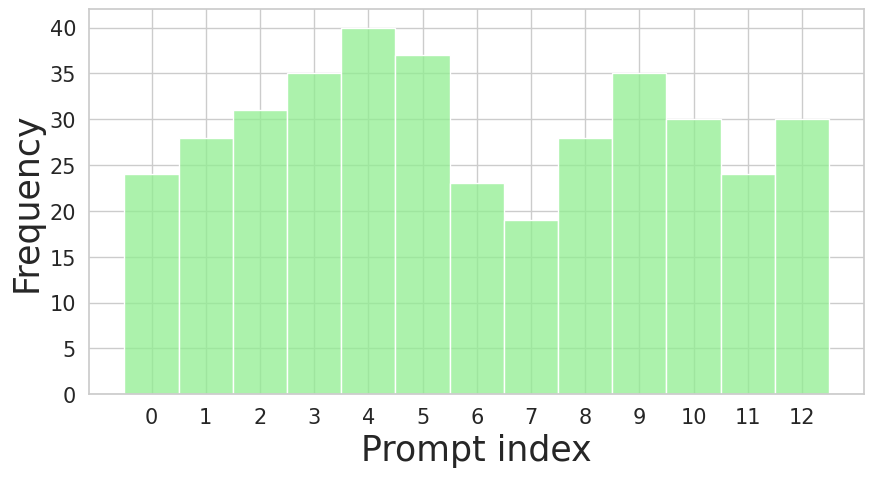

In [129]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(prompt_hist.numpy().flatten(), bins=range(num_prompt+2), kde=False, color='lightgreen')
# plt.title('All Data', fontsize=16)
plt.xlabel('Prompt index', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(ticks=[x + 0.5 for x in range(13)], labels=range(num_prompt+1), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

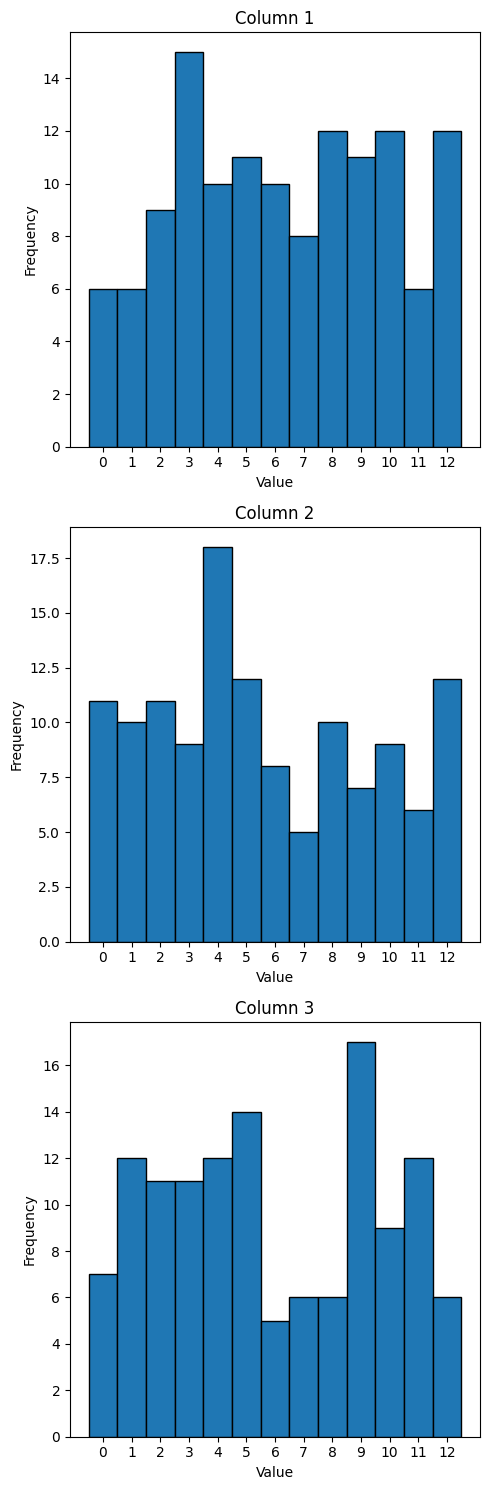

In [51]:
# Plot histograms for each column
fig, axs = plt.subplots(3, 1, figsize=(5, 15))

for i in range(3):
    axs[i].hist(prompt_hist[:, i].numpy(), bins=range(14), edgecolor='black', align='left')
    axs[i].set_title(f'Column {i+1}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xticks(range(13))

plt.tight_layout()
plt.show()

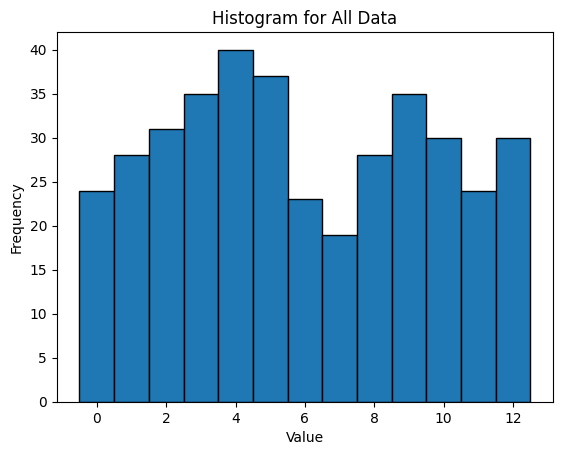

In [53]:
# 전체 30개 샘플에 대해서 histogram 그리기
plt.figure()
plt.hist(prompt_hist.numpy().flatten(), bins=range(14), edgecolor='black', align='left')
plt.title('Histogram for All Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Embedding Analysis

In [309]:
fold=3
shot=5
train_head='False'
source = 'ppgbp'
target = 'bcg'

#### Meta data

In [310]:
data_path = f'../../../../l2p_baseline/code/train/results/dataset/{target}_fold{fold}_test_data.csv'
df_meta = pd.read_csv(data_path)
print("Num of unique Patient: ", df_meta.patient.nunique())
df_meta.describe()

Num of unique Patient:  7


index          SP          DP         Age   Height_cm   Weight_kg  \
count  557.000000  557.000000  557.000000  557.000000  557.000000  557.000000   
mean   278.000000  112.688874   60.468607   27.497307  170.392101   65.253321   
std    160.936323   10.034741    6.779966   13.142635   16.186109   13.490170   
min      0.000000   87.216604   44.474808   18.000000  147.600000   48.300000   
25%    139.000000  105.186369   56.002727   19.000000  153.000000   53.600000   
50%    278.000000  113.040248   59.799503   22.000000  170.400000   62.800000   
75%    417.000000  120.615636   65.781168   27.000000  184.200000   80.700000   
max    556.000000  137.274535   78.869496   59.000000  197.800000   87.100000   

            group  
count  557.000000  
mean     1.260323  
std      0.470827  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

#### Draw tSNE

In [325]:
path = f'../results/../results/errors_{source}_{target}_shot{shot}_train_head_False_sym_{train_head}_ours.csv'
df = pd.read_csv(path)
group_ids = df.loc[df.fold==fold].group.values
# # Offical
# path_embs = glob(f"{source}-{target}*_fold{foldIdx}_shot{shot}_sym_prompt_True_train_head_{train_head}_*.pt")

# Temporal
path_embs = glob(f"../results/embeddings/{source}-{target}*_fold{fold}_shot{shot}_*.pt")
path_embs = sorted(path_embs)

print(f"Fold {fold}, Group: {set(group_ids)}")

ss_path=glob(f"../../../../l2p_baseline/code/train/results/embeddings/{source}-{source}-zeroshot_fold{fold}_shot{shot}_test_embs.pt")
ss_embs = torch.load(ss_path[0], map_location='cpu')

tt_path=glob(f"../../../../l2p_baseline/code/train/results/embeddings/{target}-{target}-zeroshot_fold{fold}_shot{shot}_test_embs.pt")
tt_embs = torch.load(tt_path[0], map_location='cpu')

st_path=glob(f"../../../../l2p_baseline/code/train/results/embeddings/{source}-{target}-zeroshot_fold{fold}_shot{shot}_test_embs.pt")
st_embs = torch.load(st_path[0], map_location='cpu')

print("Get ", path_embs[0])
hidden_embs = torch.load(path_embs[0], map_location='cpu')

Fold 3, Group: {0, 1, 2}
Get  ../results/embeddings/ppgbp-bcg-prompt_global_fold3_shot5_hidden_embs.pt


In [326]:
print(len(ss_embs), len(st_embs), len(hidden_embs))

min_count = min(len(ss_embs), len(st_embs), len(hidden_embs))

indices = torch.randint(0, len(ss_embs), (min_count,))
ss_embs_min = ss_embs[indices]

indices = torch.randint(0, len(st_embs), (min_count,))
st_embs_min = st_embs[indices]

indices = torch.randint(0, len(hidden_embs), (min_count,))
hidden_embs_min = hidden_embs[indices]

124 557 557


In [313]:
total_embedding = torch.cat((ss_embs_min, st_embs_min, hidden_embs_min))
labels=[0]*len(ss_embs_min) + [1]*len(st_embs_min) + [2]*len(hidden_embs_min)

In [314]:
ss_embs_min.shape, st_embs_min.shape, hidden_embs_min.shape

(torch.Size([124, 64]), torch.Size([124, 64]), torch.Size([124, 64]))

In [315]:
label_name = ['ZS(S->S)', 'ZS(S->T)', 'Ours']

In [316]:
data = total_embedding.numpy() if isinstance(total_embedding, torch.Tensor) else total_embedding
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne.fit_transform(data)

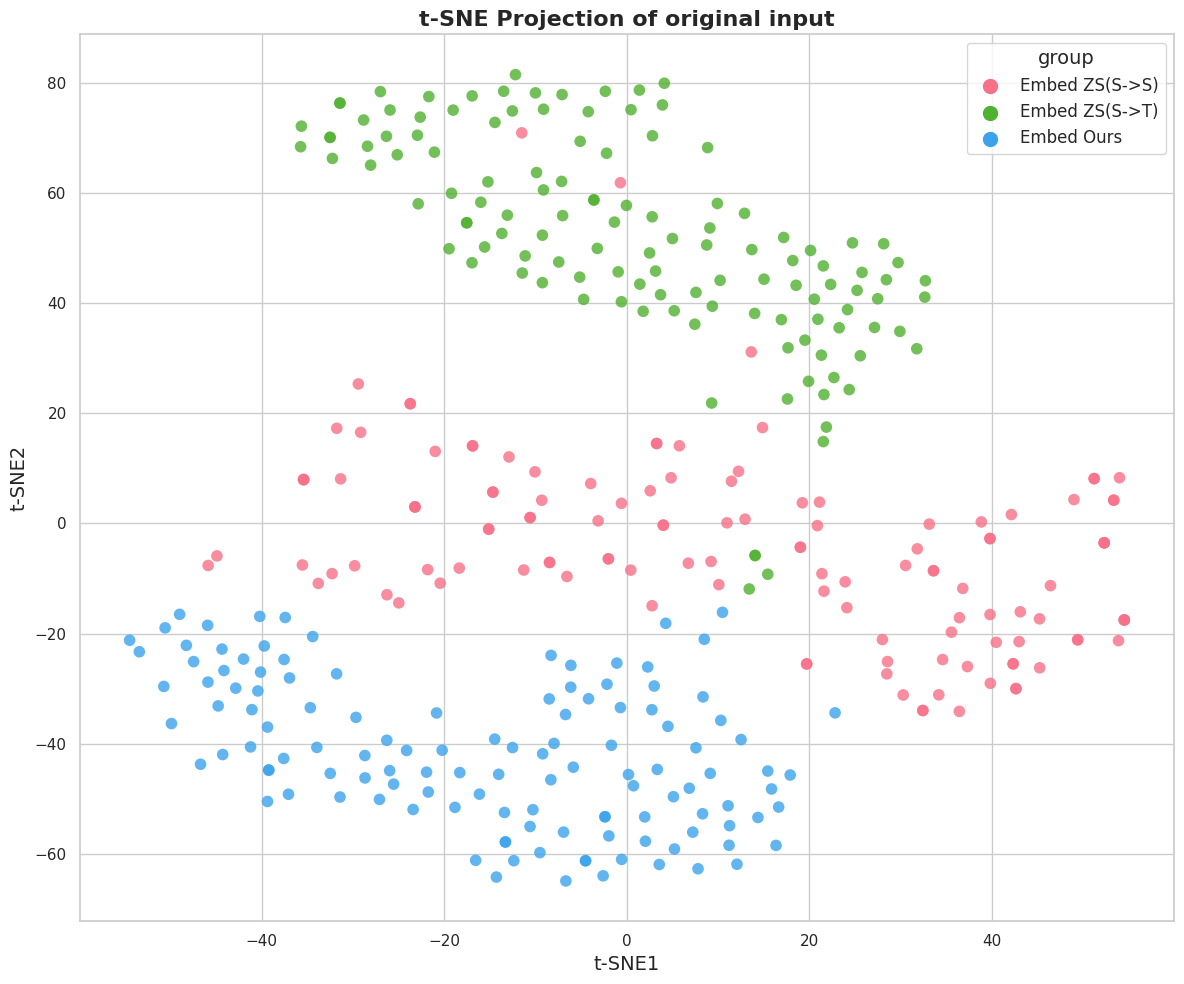

In [317]:
# Create a discrete color map with better distinction
unique_groups = sorted(set(labels))
n_groups = len(unique_groups)
colors = sns.color_palette("husl", n_colors=n_groups)  # Using seaborn's husl palette for better distinction
color_map = ListedColormap(colors)

# Create the plot with explicit white background
plt.figure(figsize=(12, 10))
ax = plt.axes()

scatter = plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], 
                      c=[unique_groups.index(label) for label in labels], cmap=color_map, 
                      s=70, alpha=0.8, edgecolors='none')

plt.title('t-SNE Projection of original input', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE1', fontsize=14)
plt.ylabel('t-SNE2', fontsize=14)

# Add a legend with larger markers
for i, group in enumerate(unique_groups):
    plt.scatter([], [], c=[colors[i]], s=100, label=f'Embed {label_name[i]}')
plt.legend(title="group", title_fontsize=14, fontsize=12, loc=0)

plt.tight_layout()
plt.show()

#### tSNE with meta data

In [348]:
k = 10  # 구간 개수
df_tsne = pd.DataFrame()
df_tsne['SP_bins'] = pd.cut(df_meta['SP'], bins=k, labels=False)

In [349]:
data = hidden_embs.numpy() if isinstance(hidden_embs, torch.Tensor) else hidden_embs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne.fit_transform(data)

In [350]:
df_tsne['tsne_1'] = tsne_embedding[:, 0]
df_tsne['tsne_2'] = tsne_embedding[:, 1]

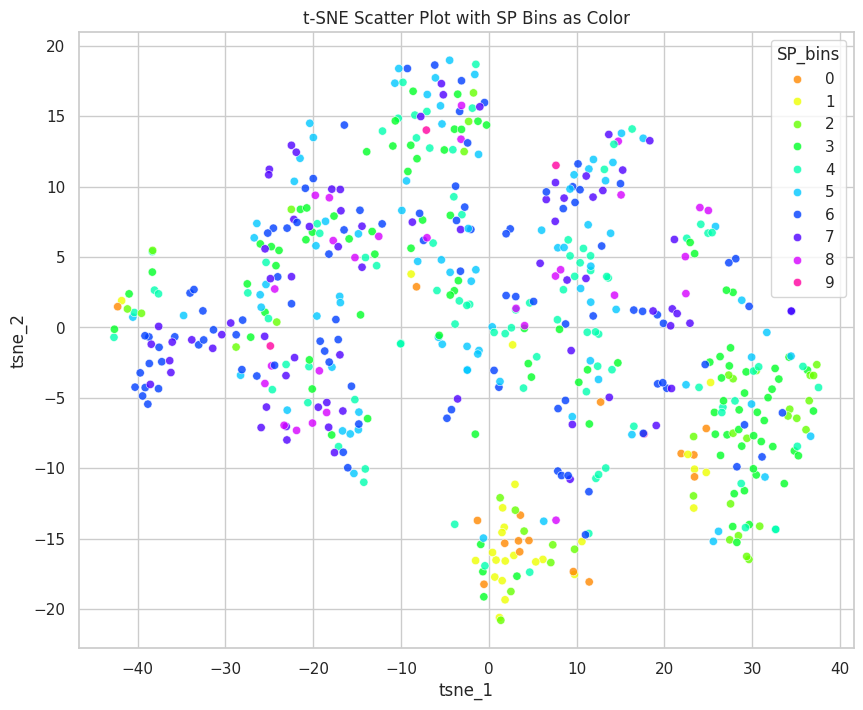

In [351]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='SP_bins',
    palette=sns.color_palette("hsv", k),
    data=df_tsne,
    legend="full",
    alpha=0.8
)

plt.title('t-SNE Scatter Plot with SP Bins as Color')
plt.show()

#### ST

In [352]:
k = 10  # 구간 개수
df_tsne = pd.DataFrame()
df_tsne['SP_bins'] = pd.cut(df_meta['SP'], bins=k, labels=False)

In [353]:
data = st_embs.numpy() if isinstance(st_embs, torch.Tensor) else st_embs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne.fit_transform(data)

In [354]:
df_tsne['tsne_1'] = tsne_embedding[:, 0]
df_tsne['tsne_2'] = tsne_embedding[:, 1]

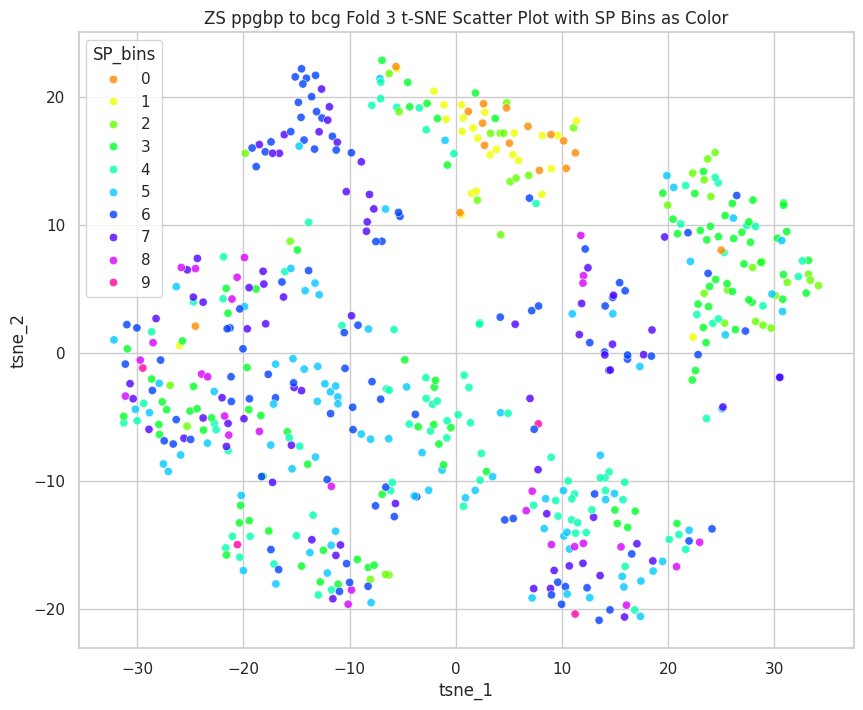

In [355]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='SP_bins',
    palette=sns.color_palette("hsv", k),
    data=df_tsne,
    legend="full",
    alpha=0.8
)

plt.title(f'ZS {source} to {target} Fold {fold} t-SNE Scatter Plot with SP Bins as Color')
plt.show()

#### TT

In [356]:
k = 10  # 구간 개수
df_tsne = pd.DataFrame()
df_tsne['SP_bins'] = pd.cut(df_meta['SP'], bins=k, labels=False)

In [357]:
data = tt_embs.numpy() if isinstance(tt_embs, torch.Tensor) else tt_embs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne.fit_transform(data)

In [358]:
df_tsne['tsne_1'] = tsne_embedding[:, 0]
df_tsne['tsne_2'] = tsne_embedding[:, 1]

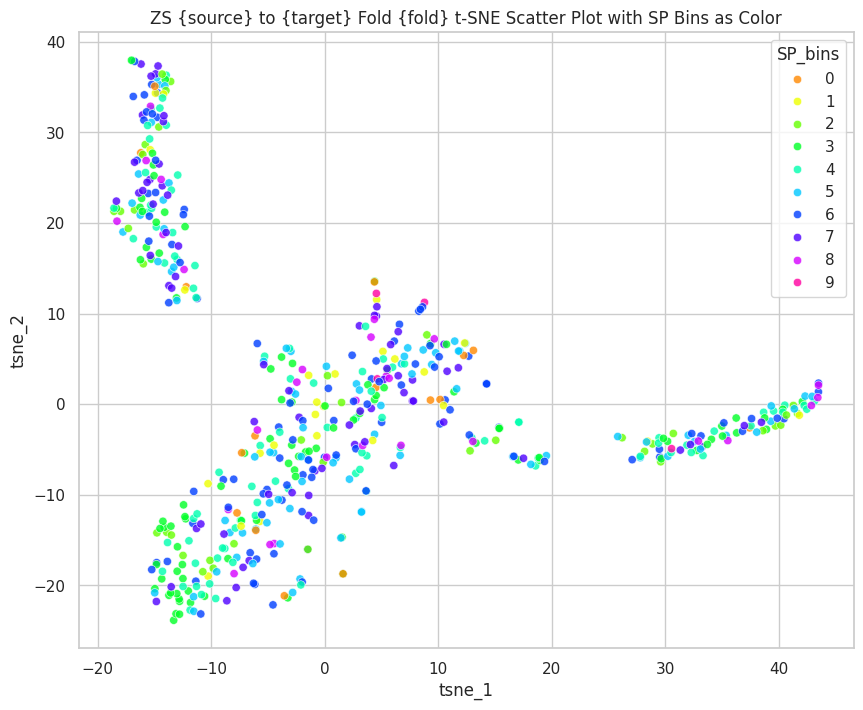

In [359]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='SP_bins',
    palette=sns.color_palette("hsv", k),
    data=df_tsne,
    legend="full",
    alpha=0.8
)

plt.title('ZS {source} to {target} Fold {fold} t-SNE Scatter Plot with SP Bins as Color')
plt.show()

### Comparing hidden embeddings

In [45]:
baseline='zeroshot'

In [46]:
path = f'../../../../l2p_baseline/code/train/results/errors_{source}-{target}-{baseline}.csv'
df = pd.read_csv(path)
group_ids = df.loc[df.fold==fold].group.values

In [47]:
path_embs = glob(f"../../../../l2p_baseline/code/train/results/embeddings/{source}-{target}-{baseline}_fold{fold}_*.pt")
path_embs = sorted(path_embs)

In [48]:
hidden_embs_baseline = torch.load(path_embs[0], map_location='cpu')

In [49]:
data_baseline = hidden_embs_baseline.numpy() if isinstance(hidden_embs_baseline, torch.Tensor) else hidden_embs_baseline
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
baseline_embedding = tsne.fit_transform(data_baseline)

In [50]:
data_prompted = hidden_embs.numpy() if isinstance(hidden_embs, torch.Tensor) else hidden_embs
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
ours_embedding = tsne.fit_transform(data_prompted)

In [51]:
x_min, x_max = min(baseline_embedding[:, 0].min(), ours_embedding[:, 0].min()), max(baseline_embedding[:, 0].max(), ours_embedding[:, 0].max())
y_min, y_max = min(baseline_embedding[:, 1].min(), ours_embedding[:, 1].min()), max(baseline_embedding[:, 1].max(), ours_embedding[:, 1].max())
x_range = x_max - x_min
y_range = y_max - y_min

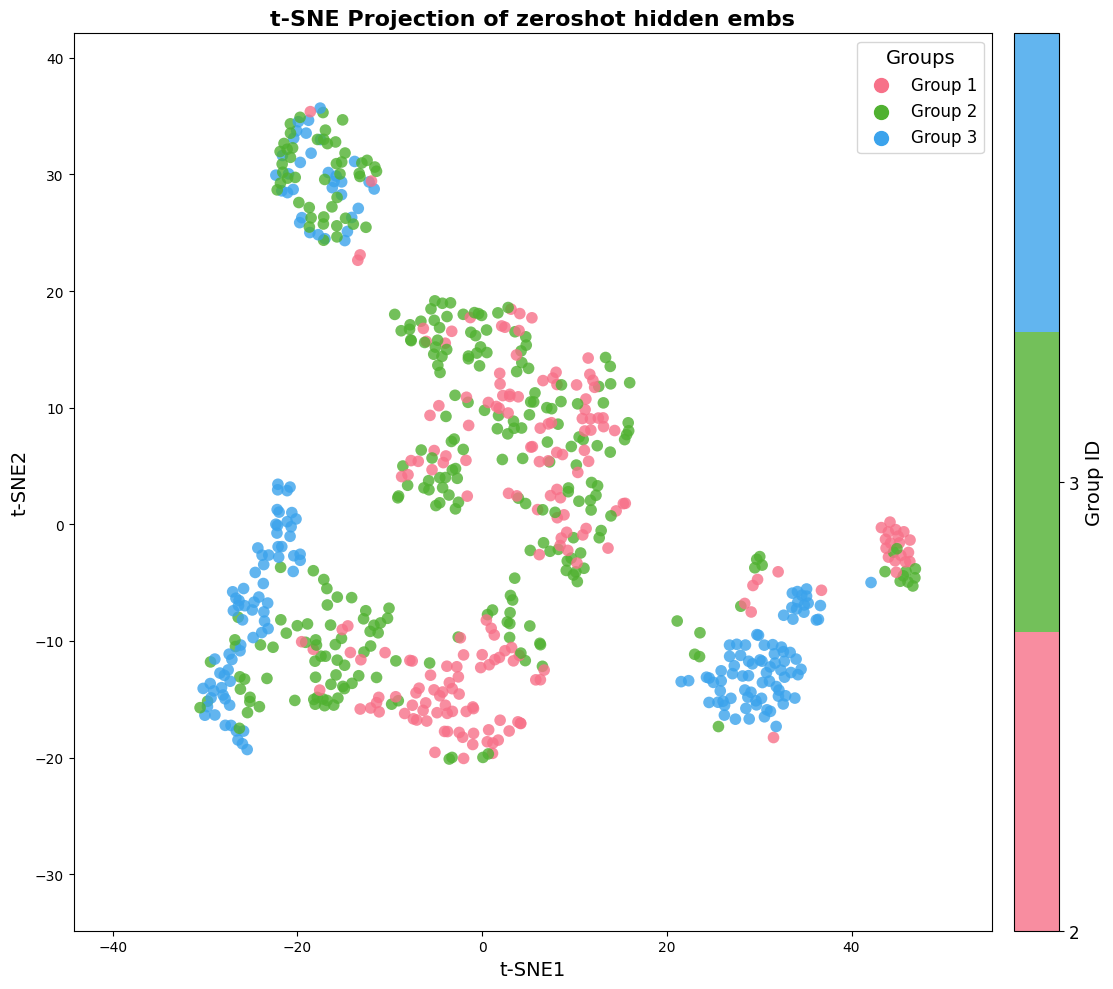

In [52]:
# Create a discrete color map with better distinction
unique_groups = sorted(set(group_ids))
n_groups = len(unique_groups)
colors = sns.color_palette("husl", n_colors=n_groups)  # Using seaborn's husl palette for better distinction
color_map = ListedColormap(colors)

# Create the plot with explicit white background
plt.figure(figsize=(12, 10))
ax = plt.axes()
# ax.set_facecolor('white')

scatter = plt.scatter(baseline_embedding[:, 0], baseline_embedding[:, 1], 
                      c=group_ids, cmap=color_map, 
                      s=70, alpha=0.8, edgecolors='none')

plt.title(f't-SNE Projection of {baseline} hidden embs', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE1', fontsize=14)
plt.ylabel('t-SNE2', fontsize=14)
plt.xlim(x_min - 0.1 * x_range, x_max + 0.1 * x_range)
plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

# Add a color bar
cbar = plt.colorbar(scatter, ticks=range(n_groups), 
                    label='Group ID', pad=0.02)
cbar.set_ticklabels(unique_groups)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Group ID', size=14)

# Add a legend with larger markers
for i, group in enumerate(unique_groups):
    plt.scatter([], [], c=[colors[i]], s=100, label=f'Group {group}')
plt.legend(title="Groups", title_fontsize=14, fontsize=12, loc=0)

plt.tight_layout()
plt.show()

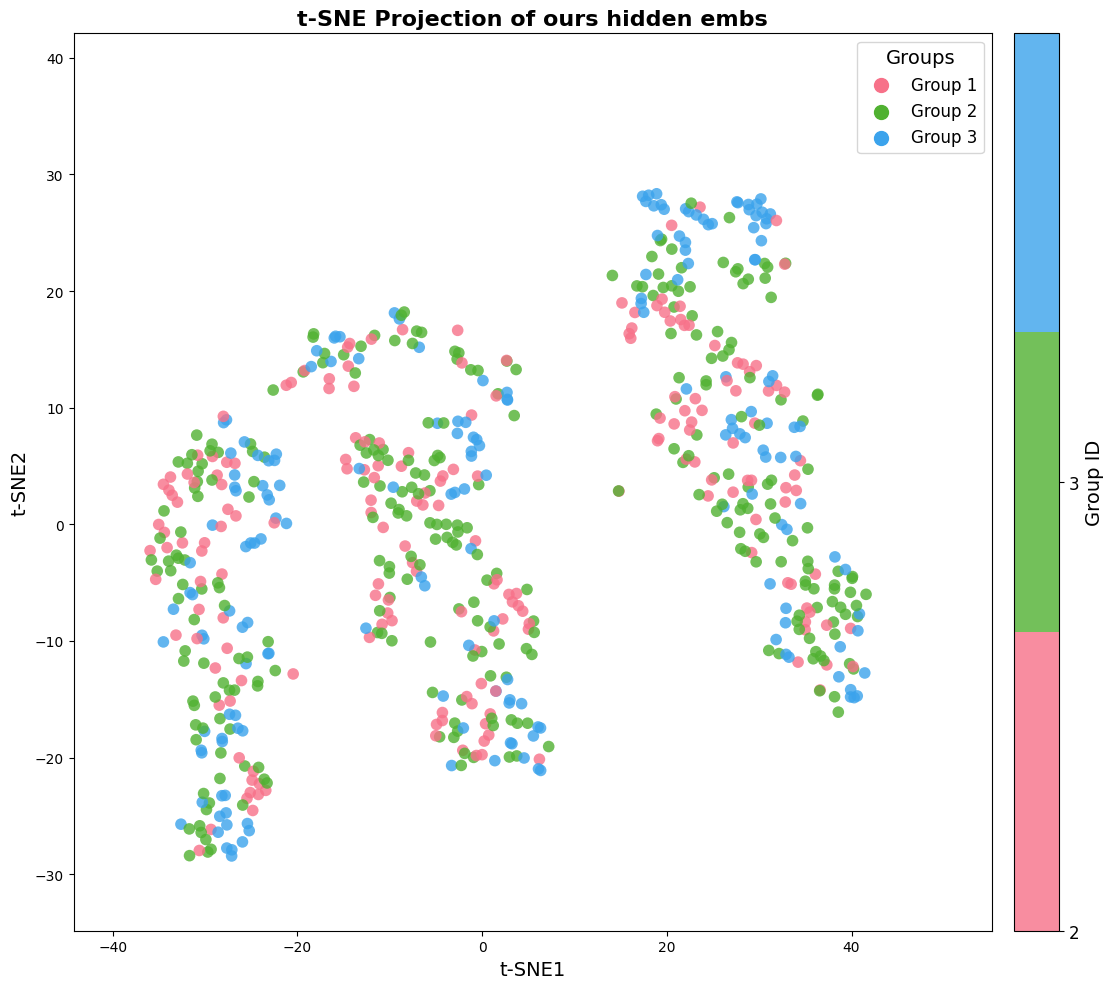

In [53]:
# Create a discrete color map with better distinction
unique_groups = sorted(set(group_ids))
n_groups = len(unique_groups)
colors = sns.color_palette("husl", n_colors=n_groups)  # Using seaborn's husl palette for better distinction
color_map = ListedColormap(colors)

# Create the plot with explicit white background
plt.figure(figsize=(12, 10))
ax = plt.axes()
# ax.set_facecolor('white')

scatter = plt.scatter(ours_embedding[:, 0], ours_embedding[:, 1], 
                      c=group_ids, cmap=color_map, 
                      s=70, alpha=0.8, edgecolors='none')

plt.title('t-SNE Projection of ours hidden embs', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE1', fontsize=14)
plt.ylabel('t-SNE2', fontsize=14)
plt.xlim(x_min - 0.1 * x_range, x_max + 0.1 * x_range)
plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

# Add a color bar
cbar = plt.colorbar(scatter, ticks=range(n_groups), 
                    label='Group ID', pad=0.02)
cbar.set_ticklabels(unique_groups)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Group ID', size=14)

# Add a legend with larger markers
for i, group in enumerate(unique_groups):
    plt.scatter([], [], c=[colors[i]], s=100, label=f'Group {group}')
plt.legend(title="Groups", title_fontsize=14, fontsize=12, loc=0)

plt.tight_layout()
plt.show()